In [1]:
import pandas as pd
file_path = '../MONDO_0004975_associations_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Step 2: Check column names to confirm correct p-value column
print(df.columns)

# Step 3: Filter SNPs with p-value < 1e-8
filtered_df = df[df['pValue'] < 1e-4]

# Step 4: Keep only variantId ending with -A, -T, -C, or -G (exclude -?)
filtered_df = filtered_df[filtered_df['riskAllele'].str.match(r'^rs\d+-[ATCG]$', na=False)]
#convert - to _
filtered_df['riskAllele'] = filtered_df['riskAllele'].str.replace('-', '_')
print(filtered_df['riskAllele'].head())
p_value5_id = filtered_df['riskAllele'].tolist()
# Step 5: Print the first 5 SNPs with p-value < 1e-8
print("SNPs with p-value < 1e-8:")
for snp in p_value5_id:
    print(snp)

Index(['riskAllele', 'pValue', 'pValueAnnotation', 'riskFrequency', 'orValue',
       'beta', 'ci', 'mappedGenes', 'traitName', 'efoTraits', 'bgTraits',
       'accessionId', 'locations', 'pubmedId', 'author'],
      dtype='object')
1     rs8077028_T
2     rs2244526_T
3    rs17022021_T
4     rs1034435_A
5     rs4760243_A
Name: riskAllele, dtype: object
SNPs with p-value < 1e-8:
rs8077028_T
rs2244526_T
rs17022021_T
rs1034435_A
rs4760243_A
rs7260181_T
rs12716755_A
rs3820443_T
rs846858_A
rs5771225_T
rs7313581_T
rs2699450_A
rs6945197_T
rs184992198_T
rs115972394_A
rs73215707_T
rs79926713_T
rs73732514_A
rs62177277_T
rs73681522_A
rs2234017_C
rs147597631_T
rs145848414_A
rs147985478_A
rs116050881_T
rs186542490_A
rs186076999_T
rs141521929_T
rs73865608_A
rs184614511_T
rs193129245_A
rs150061627_T
rs190457471_A
rs141387448_T
rs117760708_T
rs187423924_A
rs181634374_T
rs145228677_C
rs188699384_A
rs148003968_A
rs185867524_A
rs117756856_A
rs184457411_A
rs180751169_T
rs188392327_A
rs192232892_T
rs149839

In [2]:
import pandas as pd
data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)

/tmp/ipykernel_3898/436810400.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)


In [3]:
len(data_with_no_filtering.columns)

592538

In [4]:
id_of_pvalue5 = []
for col in data_with_no_filtering.columns:
    if col in p_value5_id:
        print(col, "is in the list")
        id_of_pvalue5.append(col)
print(id_of_pvalue5)


rs4255357_G is in the list
rs2970989_T is in the list
rs1552244_A is in the list
rs17022021_T is in the list
rs9832461_A is in the list
rs17785248_A is in the list
rs4974424_A is in the list
rs1923775_T is in the list
rs1448284_T is in the list
rs10012882_T is in the list
rs13178362_T is in the list
rs29745_A is in the list
rs6882046_A is in the list
rs543844_A is in the list
rs9381563_T is in the list
rs2718058_A is in the list
rs11771145_G is in the list
rs7016182_C is in the list
rs956225_A is in the list
rs474951_T is in the list
rs7155434_A is in the list
rs10498633_G is in the list
rs2456930_G is in the list
rs8049439_T is in the list
rs450674_T is in the list
rs16973424_A is in the list
rs440277_G is in the list
rs8106922_A is in the list
rs5167_T is in the list
['rs4255357_G', 'rs2970989_T', 'rs1552244_A', 'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A', 'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T', 'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs93815

In [5]:
# read the data again with the selected columns and first 6 columns of data and first 5 rows
metadata_cols = ['IID', 'SEX', 'PHENOTYPE',]

# Combine metadata columns with your filtered SNP rsIDs
columns_to_use = metadata_cols + id_of_pvalue5

# Read only those columns (first 5 + selected SNPs) and first 5 rows
data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


/tmp/ipykernel_3898/990478919.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


In [6]:
#caclulate missing values of every column
missing_values = data_with_filtering.isnull().sum()
# Print the missing values
print("Missing values in each column:")
print(missing_values)
#see the minimum and median and maximum of the data


Missing values in each column:
IID             0
SEX             0
PHENOTYPE       0
rs4255357_G     7
rs2970989_T     0
rs1552244_A     0
rs17022021_T    0
rs9832461_A     0
rs17785248_A    4
rs4974424_A     2
rs1923775_T     0
rs1448284_T     0
rs10012882_T    2
rs13178362_T    1
rs29745_A       1
rs6882046_A     2
rs543844_A      0
rs9381563_T     9
rs2718058_A     1
rs11771145_G    0
rs7016182_C     0
rs956225_A      0
rs474951_T      1
rs7155434_A     2
rs10498633_G    0
rs2456930_G     1
rs8049439_T     0
rs450674_T      0
rs16973424_A    1
rs440277_G      0
rs8106922_A     0
rs5167_T        0
dtype: int64


In [7]:
# Load ADNIMERGE
adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')

# Filter to baseline diagnoses
adni_dx = adni_merge[adni_merge['VISCODE'] == 'bl'][['RID', 'DX']]

# Extract RID from IID if needed (only if IID is like '014_S_0520')
data_with_filtering['RID'] = data_with_filtering['IID'].str.extract(r'_(\d+)$')[0].astype(int)

# Merge DX into your dataset
data_with_filtering = data_with_filtering.merge(adni_dx, on='RID', how='left')

# Drop RID if no longer needed
data_with_filtering.drop(columns=['RID'], inplace=True)

# Check merge result
print("Missing DX labels:", data_with_filtering['DX'].isna().sum())

Missing DX labels: 0


/tmp/ipykernel_3898/4016535944.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')


In [8]:
print(data_with_filtering.columns)


Index(['IID', 'SEX', 'PHENOTYPE', 'rs4255357_G', 'rs2970989_T', 'rs1552244_A',
       'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A',
       'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T',
       'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs9381563_T', 'rs2718058_A',
       'rs11771145_G', 'rs7016182_C', 'rs956225_A', 'rs474951_T',
       'rs7155434_A', 'rs10498633_G', 'rs2456930_G', 'rs8049439_T',
       'rs450674_T', 'rs16973424_A', 'rs440277_G', 'rs8106922_A', 'rs5167_T',
       'DX'],
      dtype='object')


In [9]:
columns_to_remove = [ 'IID','SEX','PHENOTYPE']  # Adjust the list based on your data

# Drop the specified columns
data_cleaned_with_just_dx_and_snp = data_with_filtering.drop(columns=columns_to_remove)
#convert data_cleaned_with_just_dx_and_snp to file

In [10]:
# Fill missing values with mode for all columns except 'DX'
for column in data_cleaned_with_just_dx_and_snp.columns:
    if column != 'DX':
        mode_value = data_cleaned_with_just_dx_and_snp[column].mode()[0]
        data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)

/tmp/ipykernel_3898/1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)
/tmp/ipykernel_3898/1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [11]:
# Map DX values to numerical values
dx_mapping = {'CN': 0, 'MCI': 0, 'Dementia': 1}
data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)

/tmp/ipykernel_3898/2107091537.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)


In [12]:
print(data_cleaned_with_just_dx_and_snp['DX'].value_counts())

DX
0    577
1    180
Name: count, dtype: int64


In [13]:
#change all float64 columns to int64
for column in data_cleaned_with_just_dx_and_snp.columns:
    if data_cleaned_with_just_dx_and_snp[column].dtype == 'float64':
        data_cleaned_with_just_dx_and_snp[column] = data_cleaned_with_just_dx_and_snp[column].astype('int64')
#save the data_cleaned_with_just_dx_and_snp to a file

In [14]:
# train and test split
from sklearn.model_selection import train_test_split
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']


📌 Evaluating for random state: 66
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble

📊 CV + Test Results:
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.7950             0.7761    0.6791   
SVM (Linear)            0.7900             0.7689    0.6696   
SVM (RBF)               0.9050             0.8603    0.8236   
MLP (Basic)             0.9075             0.8791    0.8387   
MLP (Deep)              0.8906             0.8532    0.8048   
XGBoost                 0.8975             0.8659    0.8199   
Random Forest           0.8606             0.8050    0.7393   
Gradient Boosting       0.8706             0.8474    0.7827   
Ada

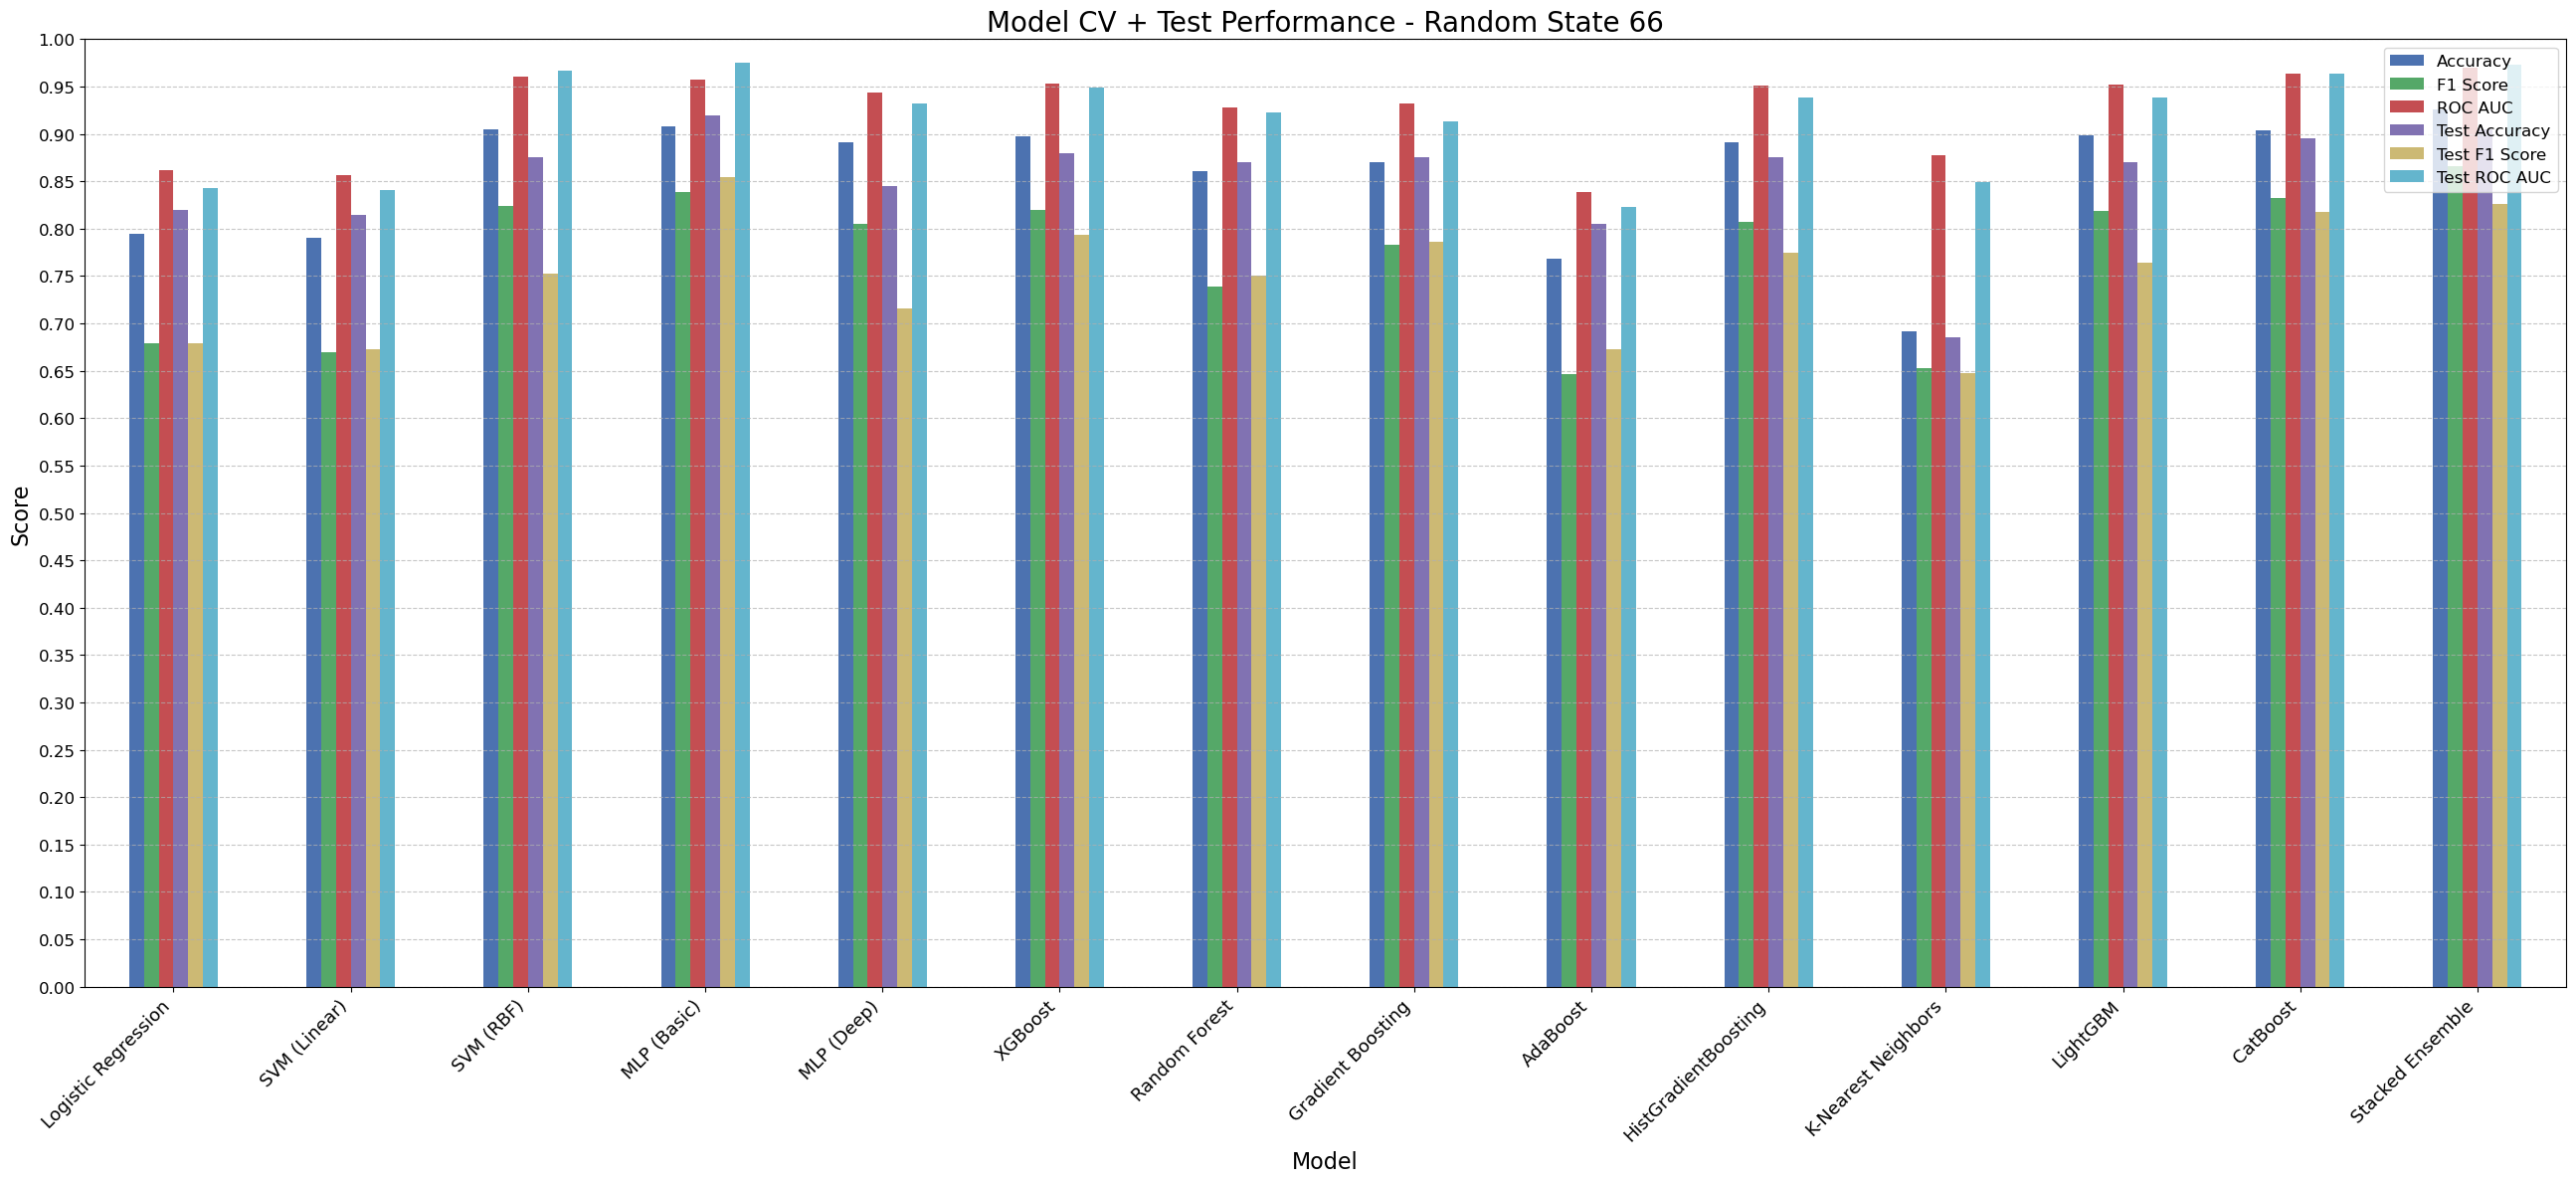


📌 Evaluating for random state: 20
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble

📊 CV + Test Results:
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.7806             0.7634    0.6612   
SVM (Linear)            0.7762             0.7585    0.6548   
SVM (RBF)               0.9050             0.8640    0.8271   
MLP (Basic)             0.9062             0.8776    0.8358   
MLP (Deep)              0.8856             0.8533    0.8002   
XGBoost                 0.8875             0.8555    0.8025   
Random Forest           0.8562             0.7940    0.7261   
Gradient Boosting       0.8638             0.8315    0.7648   
Ada

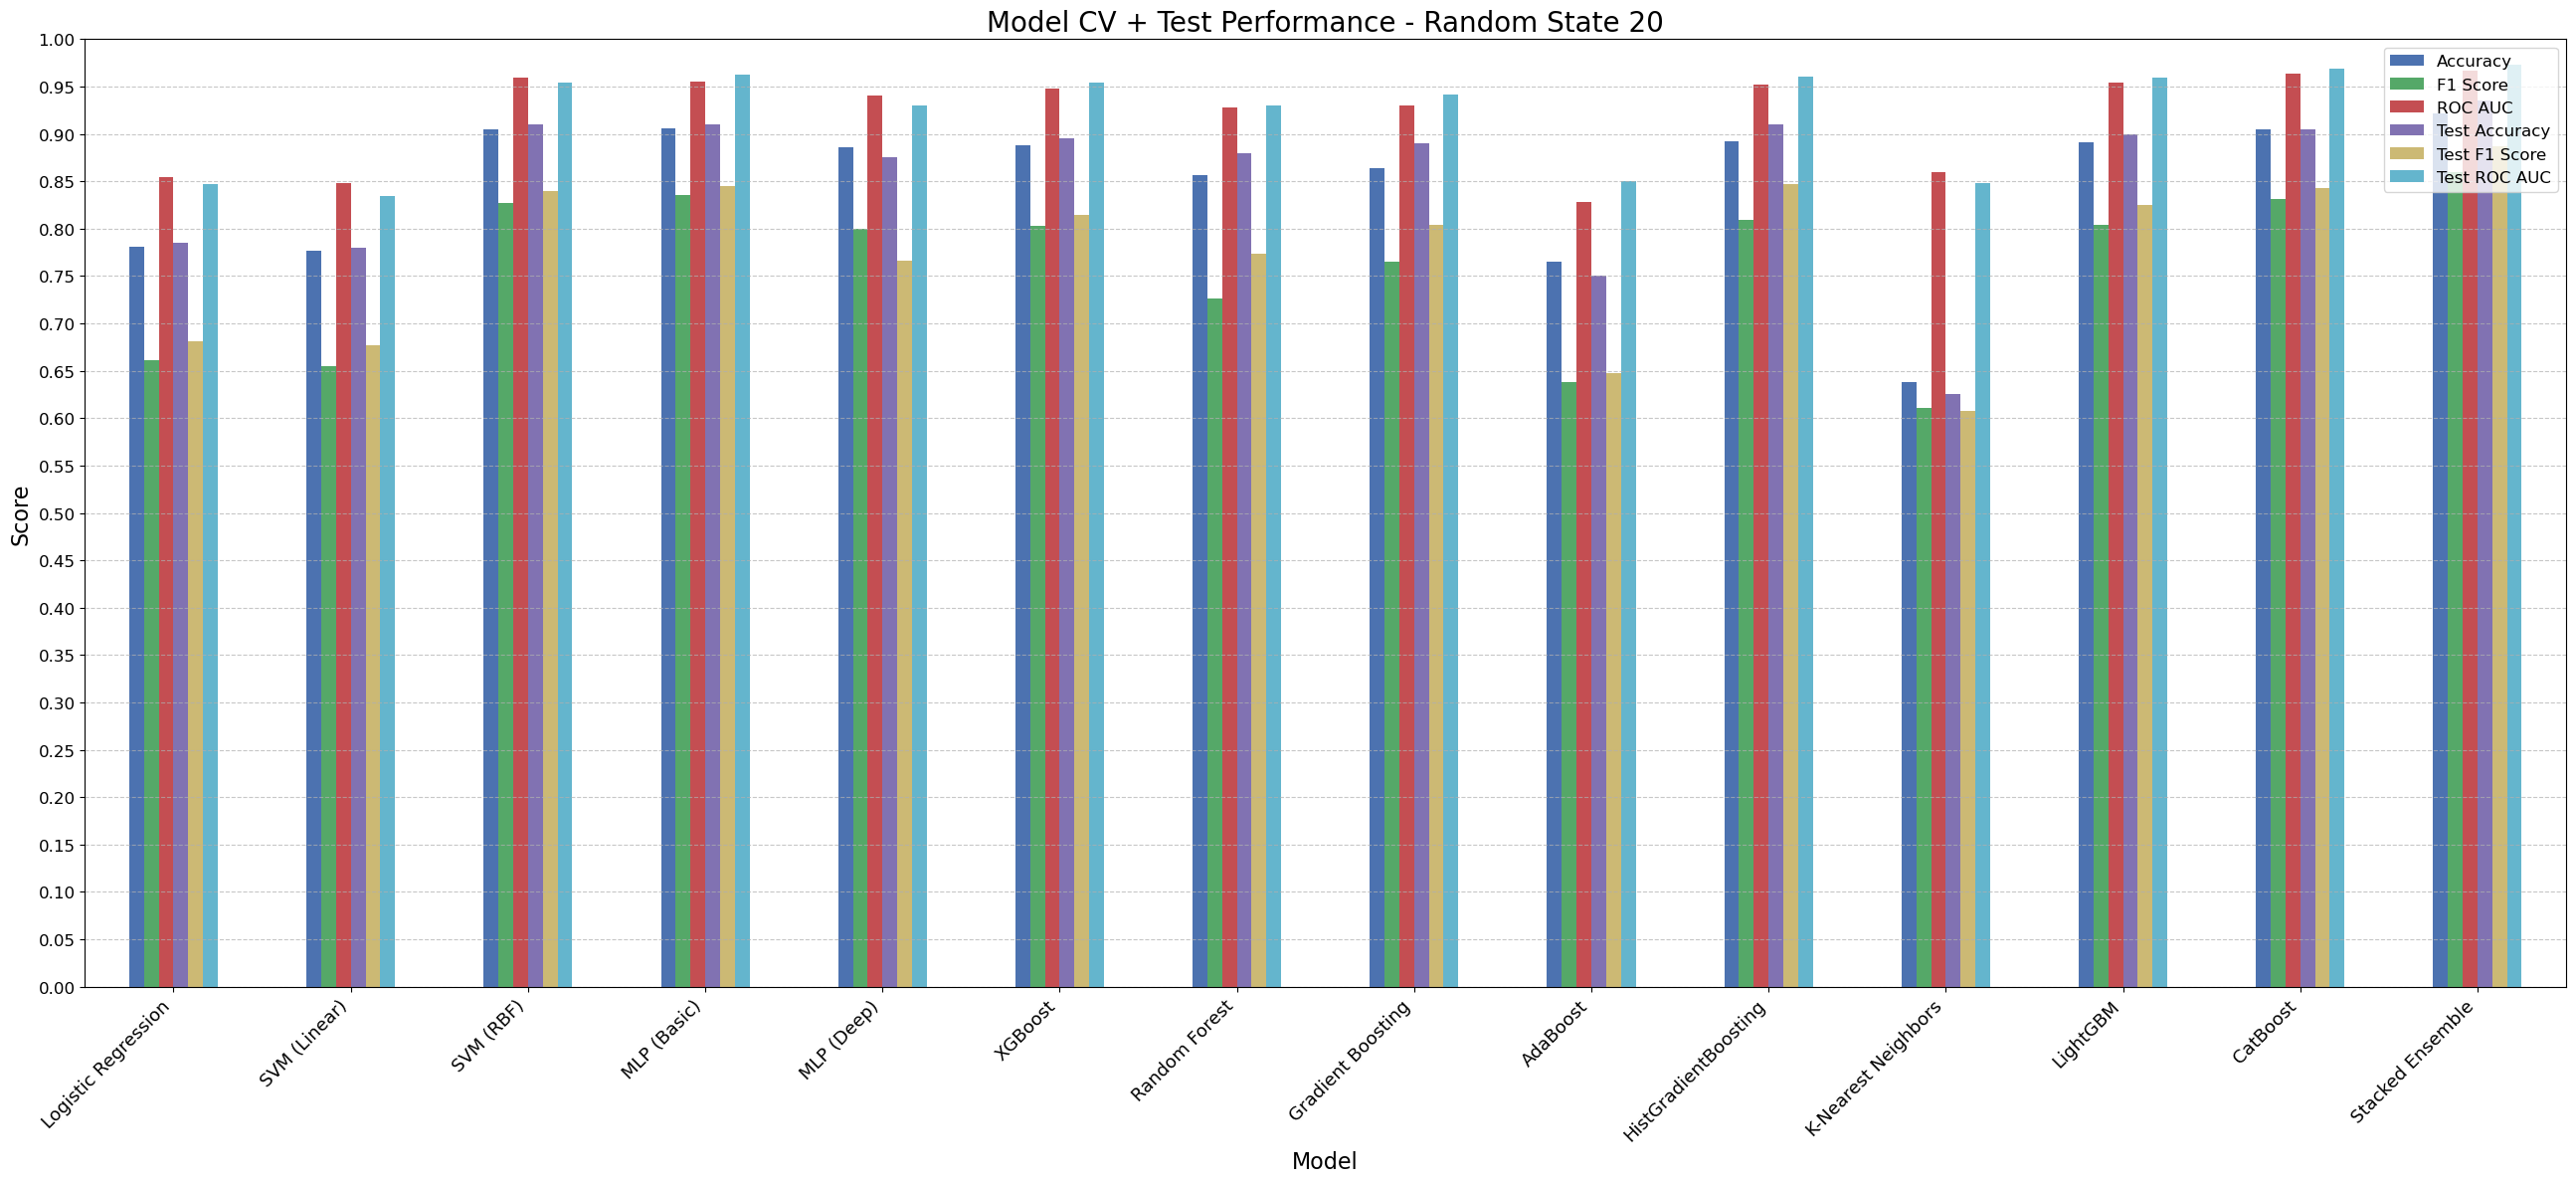


📌 Evaluating for random state: 87
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble

📊 CV + Test Results:
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.7781             0.7658    0.6632   
SVM (Linear)            0.7881             0.7717    0.6730   
SVM (RBF)               0.8869             0.8367    0.7880   
MLP (Basic)             0.8994             0.8698    0.8243   
MLP (Deep)              0.8688             0.8269    0.7653   
XGBoost                 0.8862             0.8484    0.7977   
Random Forest           0.8594             0.8002    0.7332   
Gradient Boosting       0.8662             0.8354    0.7717   
Ada

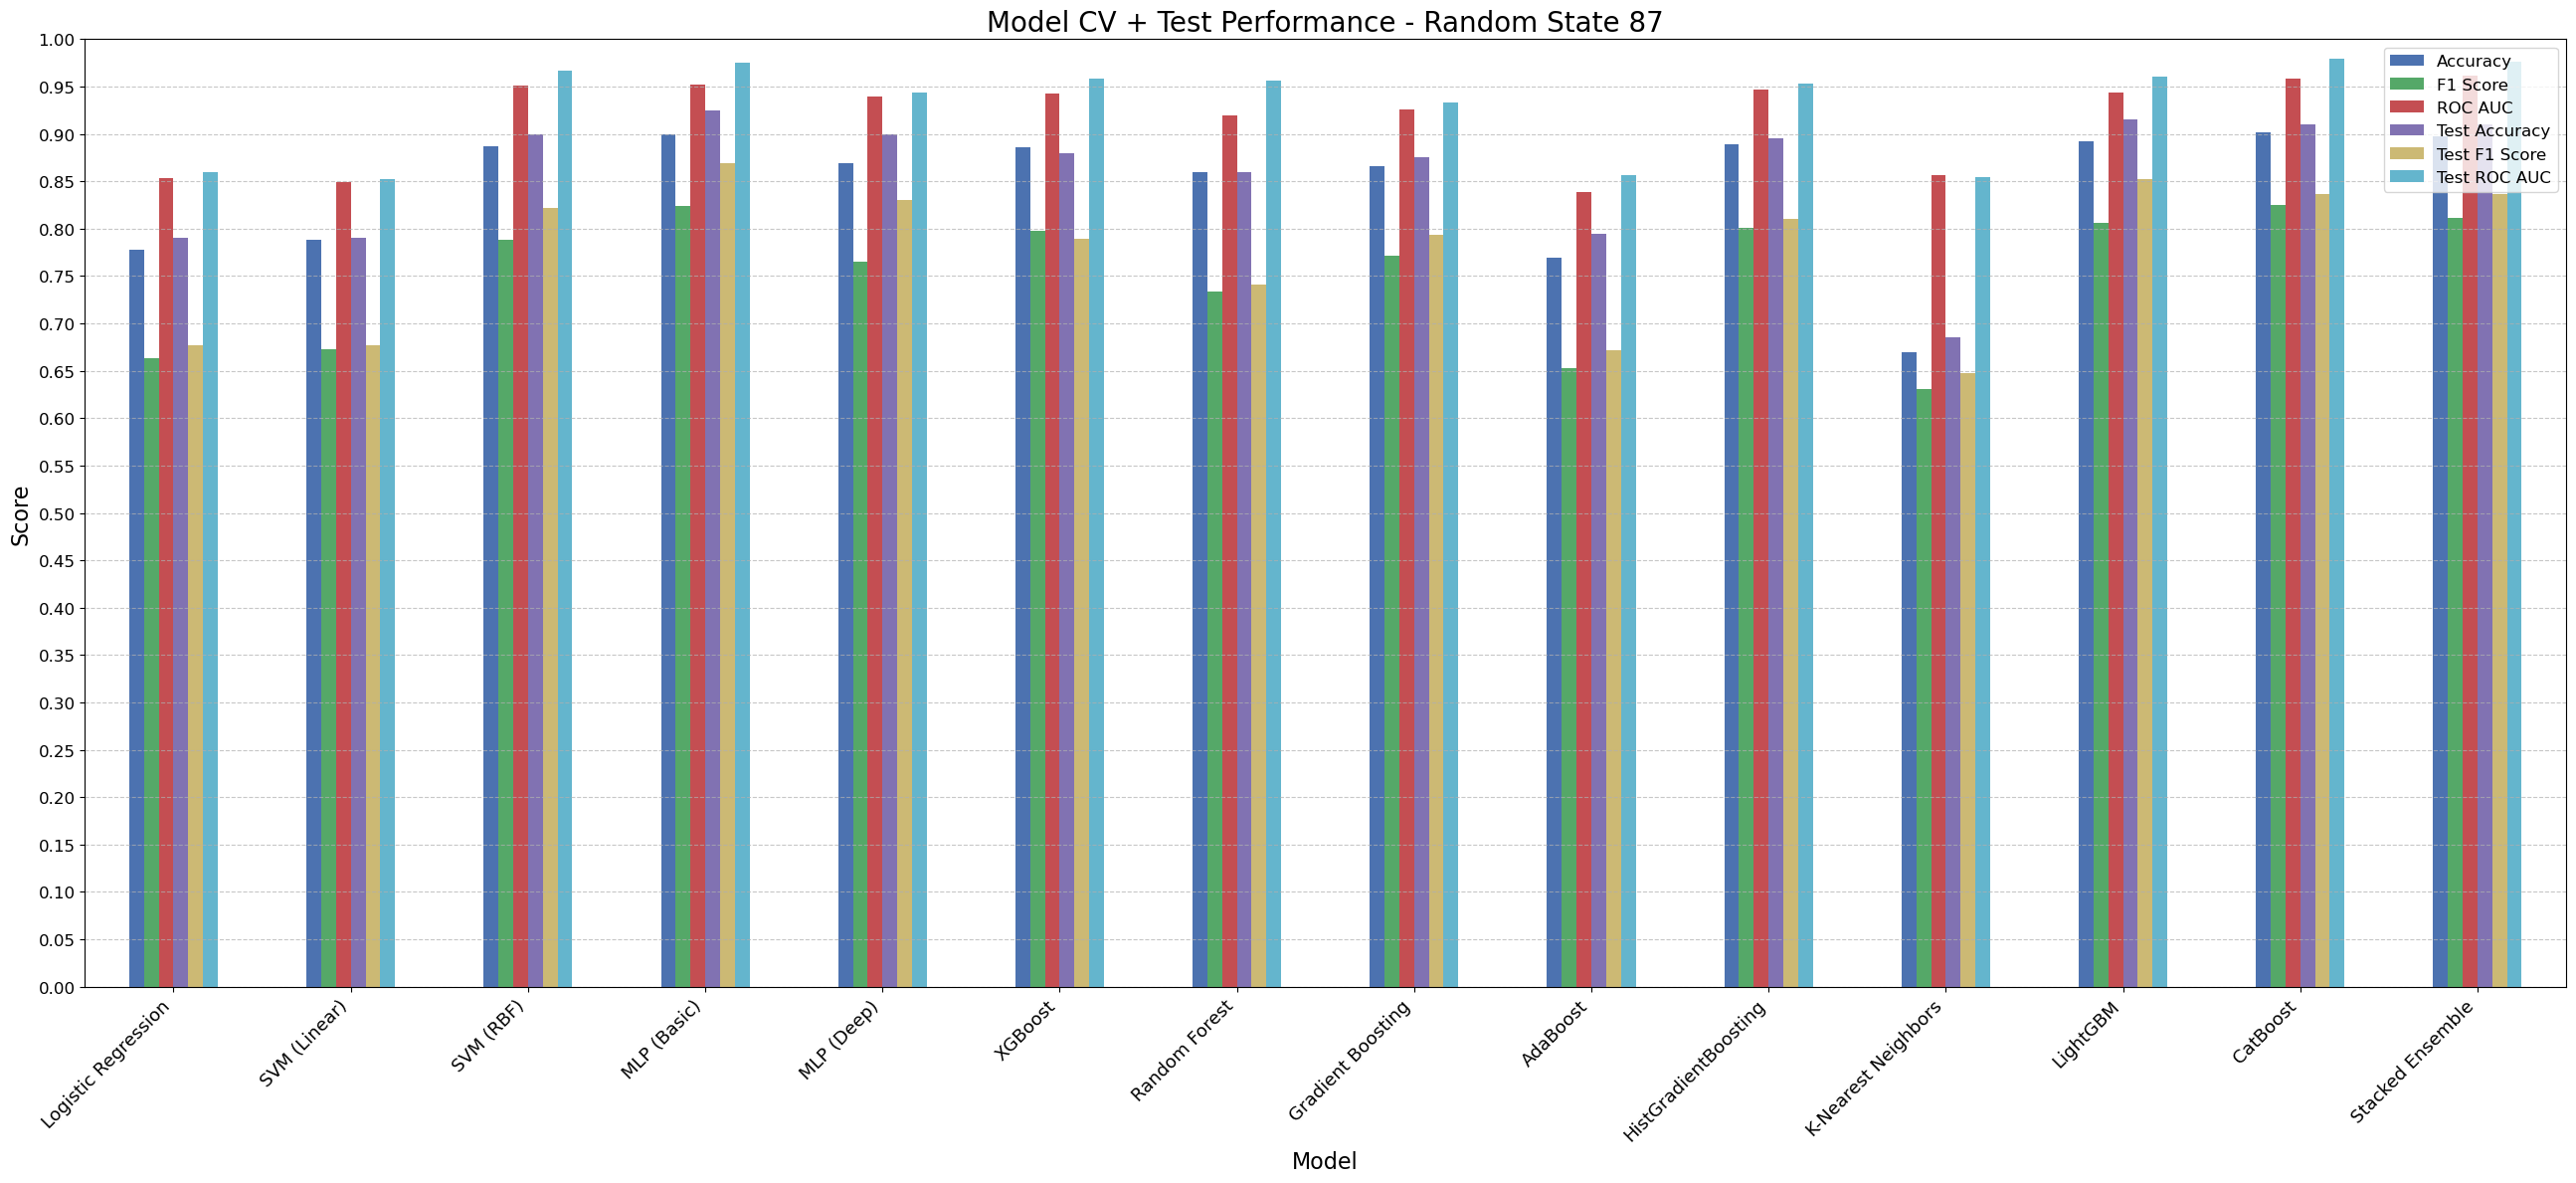


📌 Evaluating for random state: 141
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble

📊 CV + Test Results:
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.7806             0.7627    0.6608   
SVM (Linear)            0.7806             0.7681    0.6653   
SVM (RBF)               0.8950             0.8454    0.8037   
MLP (Basic)             0.8981             0.8669    0.8219   
MLP (Deep)              0.8806             0.8430    0.7889   
XGBoost                 0.8806             0.8472    0.7924   
Random Forest           0.8562             0.7919    0.7218   
Gradient Boosting       0.8669             0.8418    0.7766   
Ad

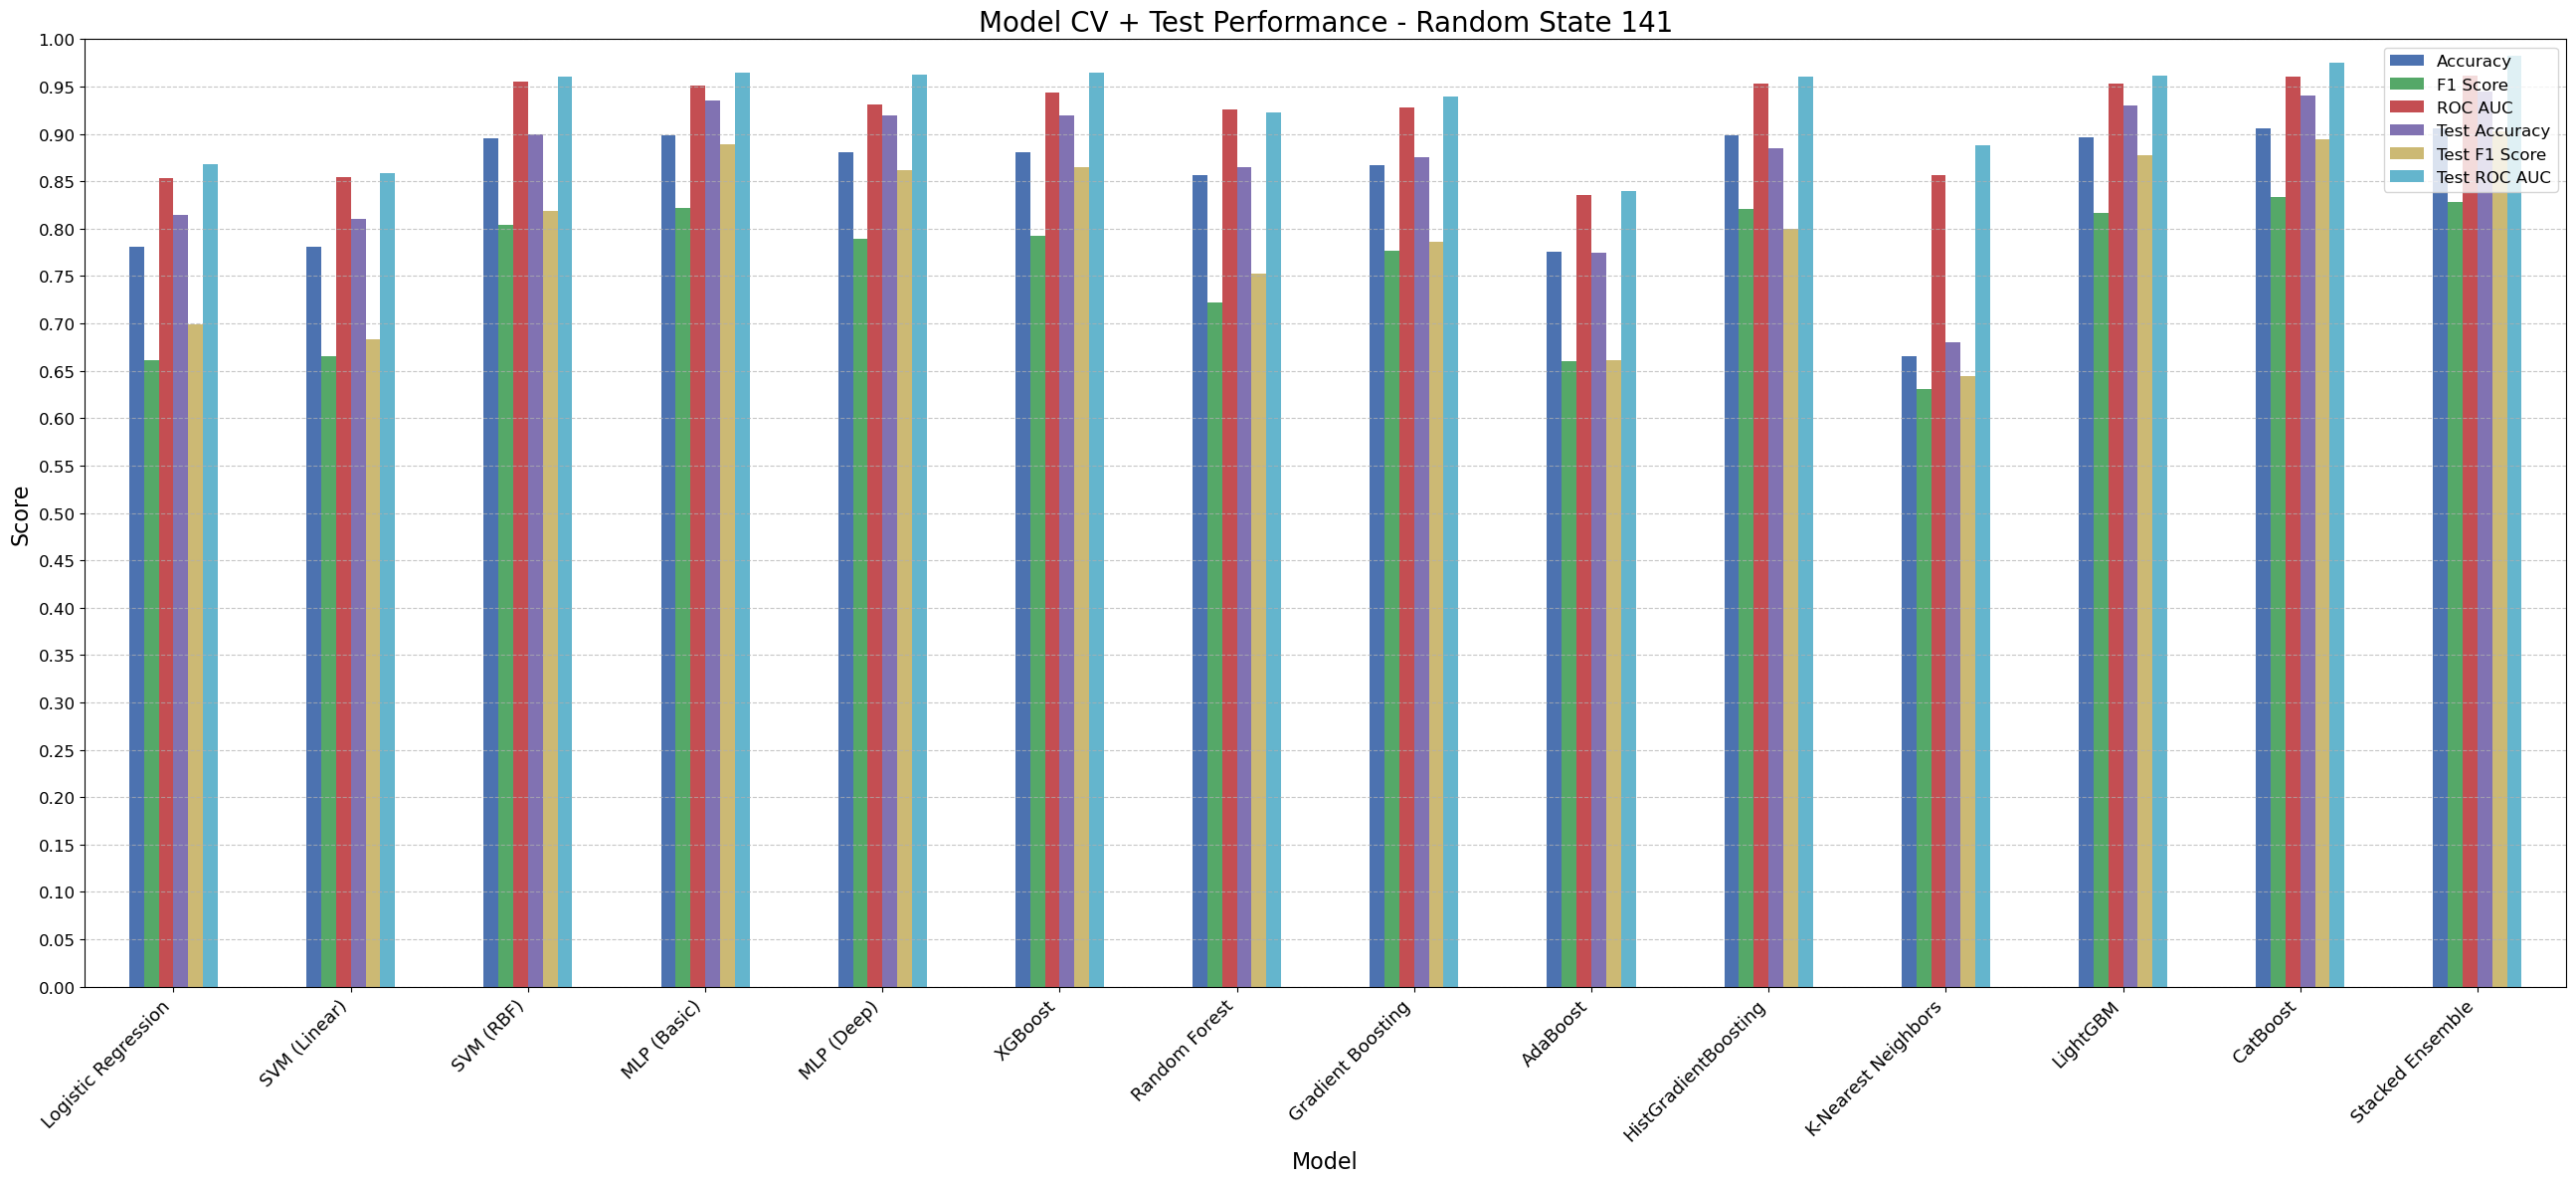


📌 Evaluating for random state: 69
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble

📊 CV + Test Results:
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.7906             0.7745    0.6756   
SVM (Linear)            0.7794             0.7659    0.6630   
SVM (RBF)               0.8888             0.8390    0.7909   
MLP (Basic)             0.8944             0.8610    0.8117   
MLP (Deep)              0.8788             0.8396    0.7823   
XGBoost                 0.8919             0.8624    0.8116   
Random Forest           0.8581             0.7996    0.7318   
Gradient Boosting       0.8706             0.8443    0.7801   
Ada

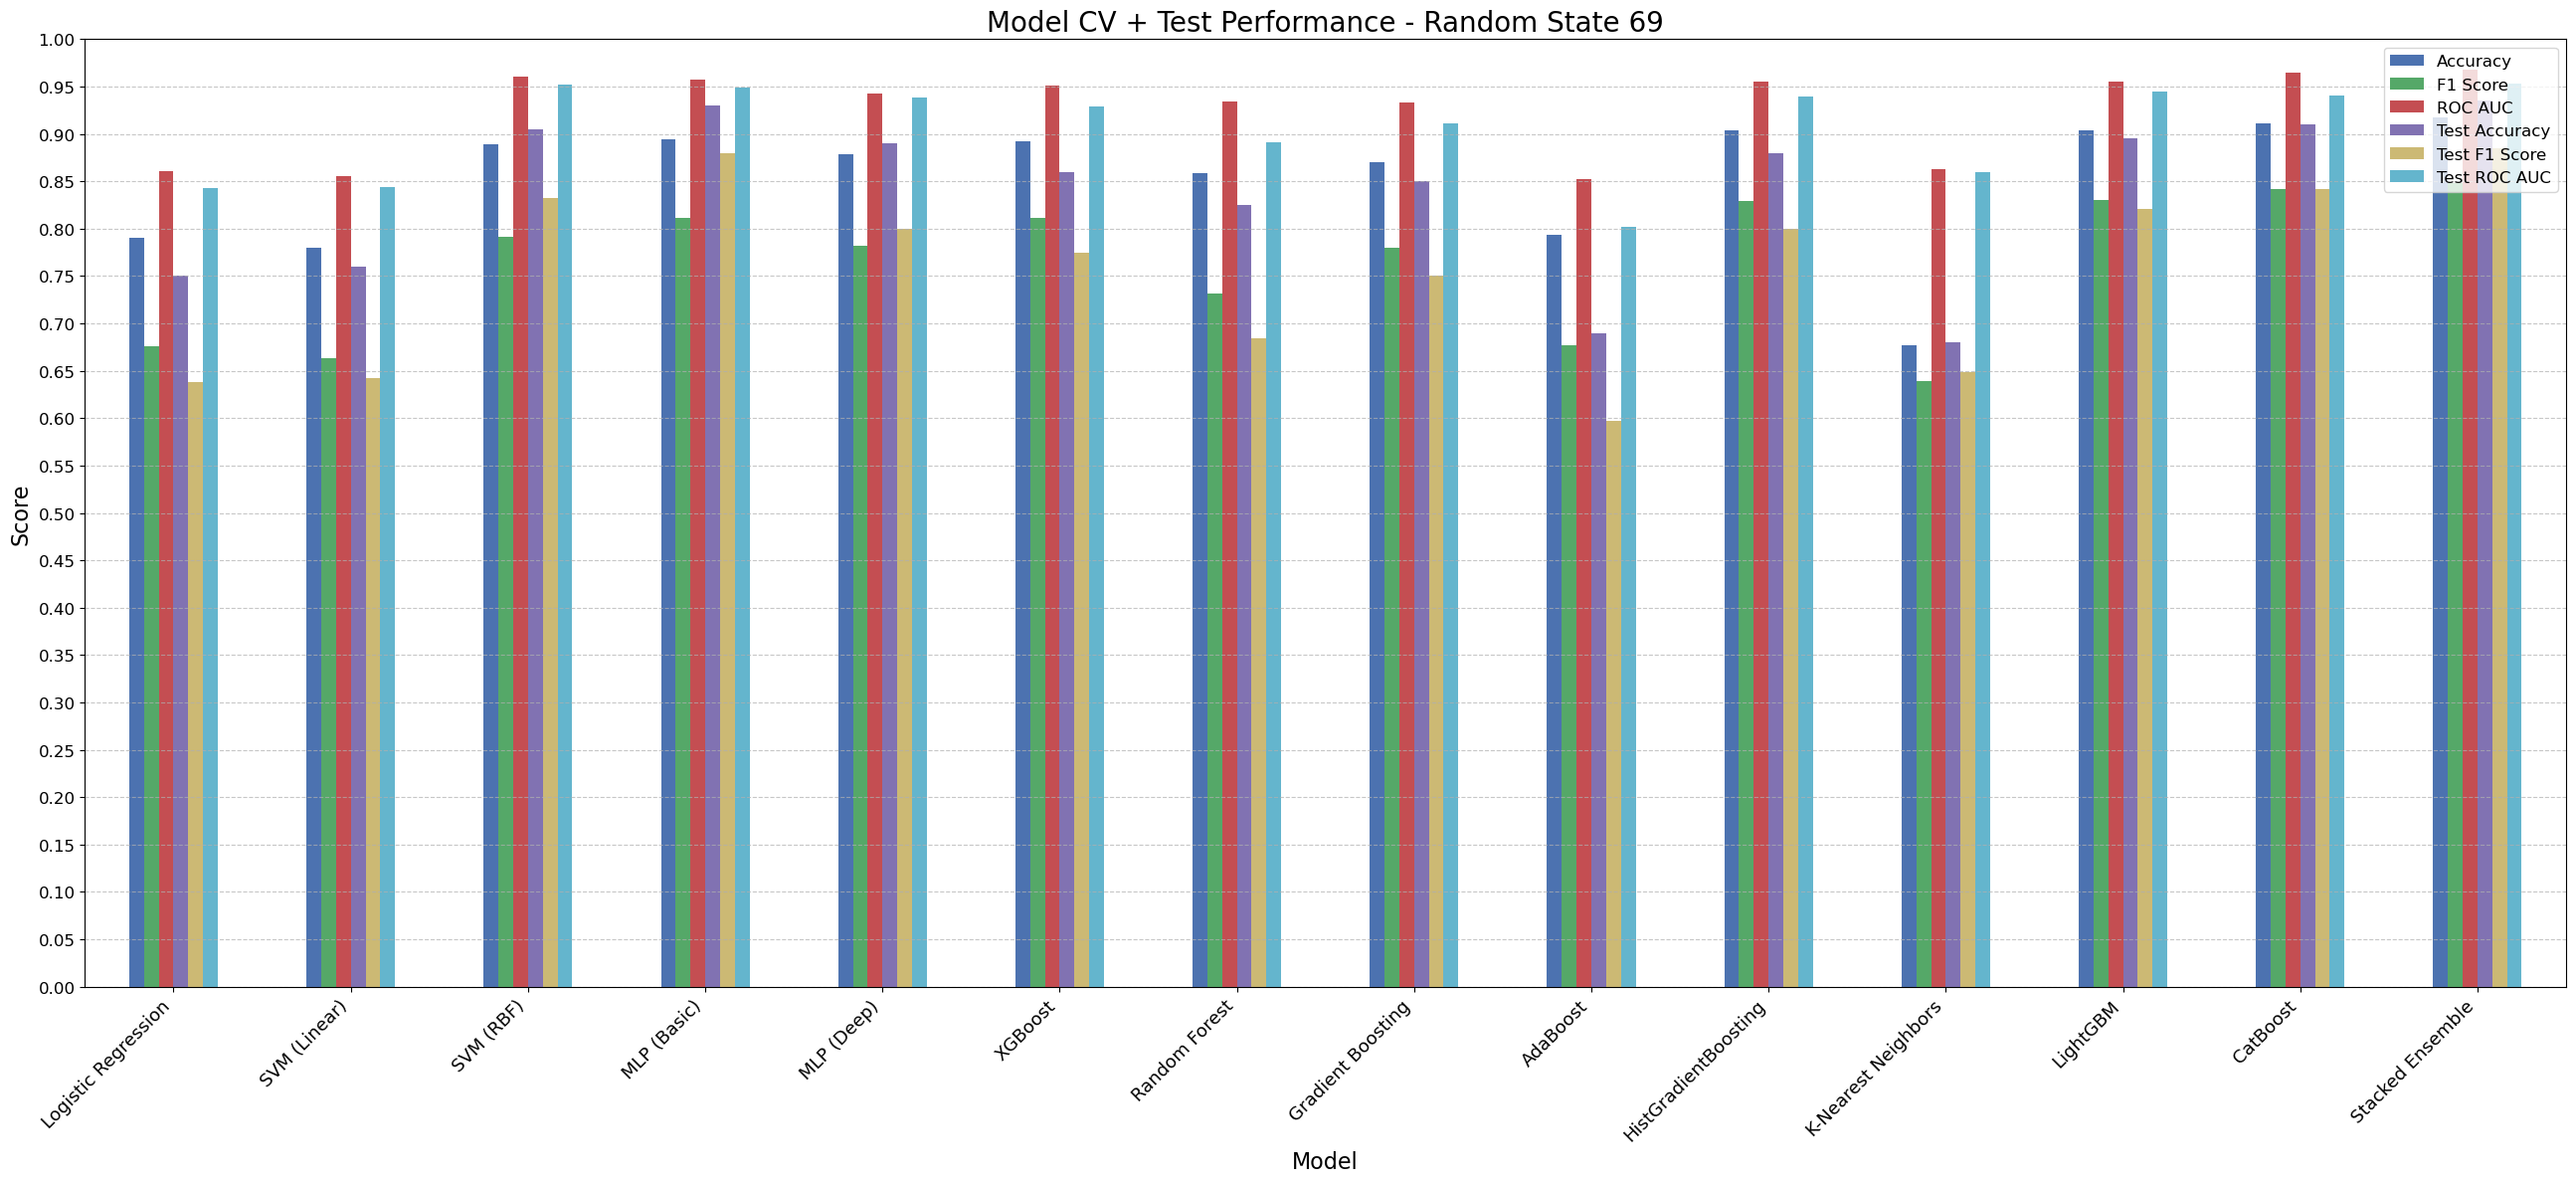


📌 Evaluating for random state: 90
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble

📊 CV + Test Results:
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.7725             0.7551    0.6513   
SVM (Linear)            0.7688             0.7482    0.6425   
SVM (RBF)               0.8812             0.8248    0.7727   
MLP (Basic)             0.9031             0.8729    0.8302   
MLP (Deep)              0.8806             0.8365    0.7831   
XGBoost                 0.8856             0.8501    0.7989   
Random Forest           0.8606             0.7973    0.7315   
Gradient Boosting       0.8662             0.8369    0.7723   
Ada

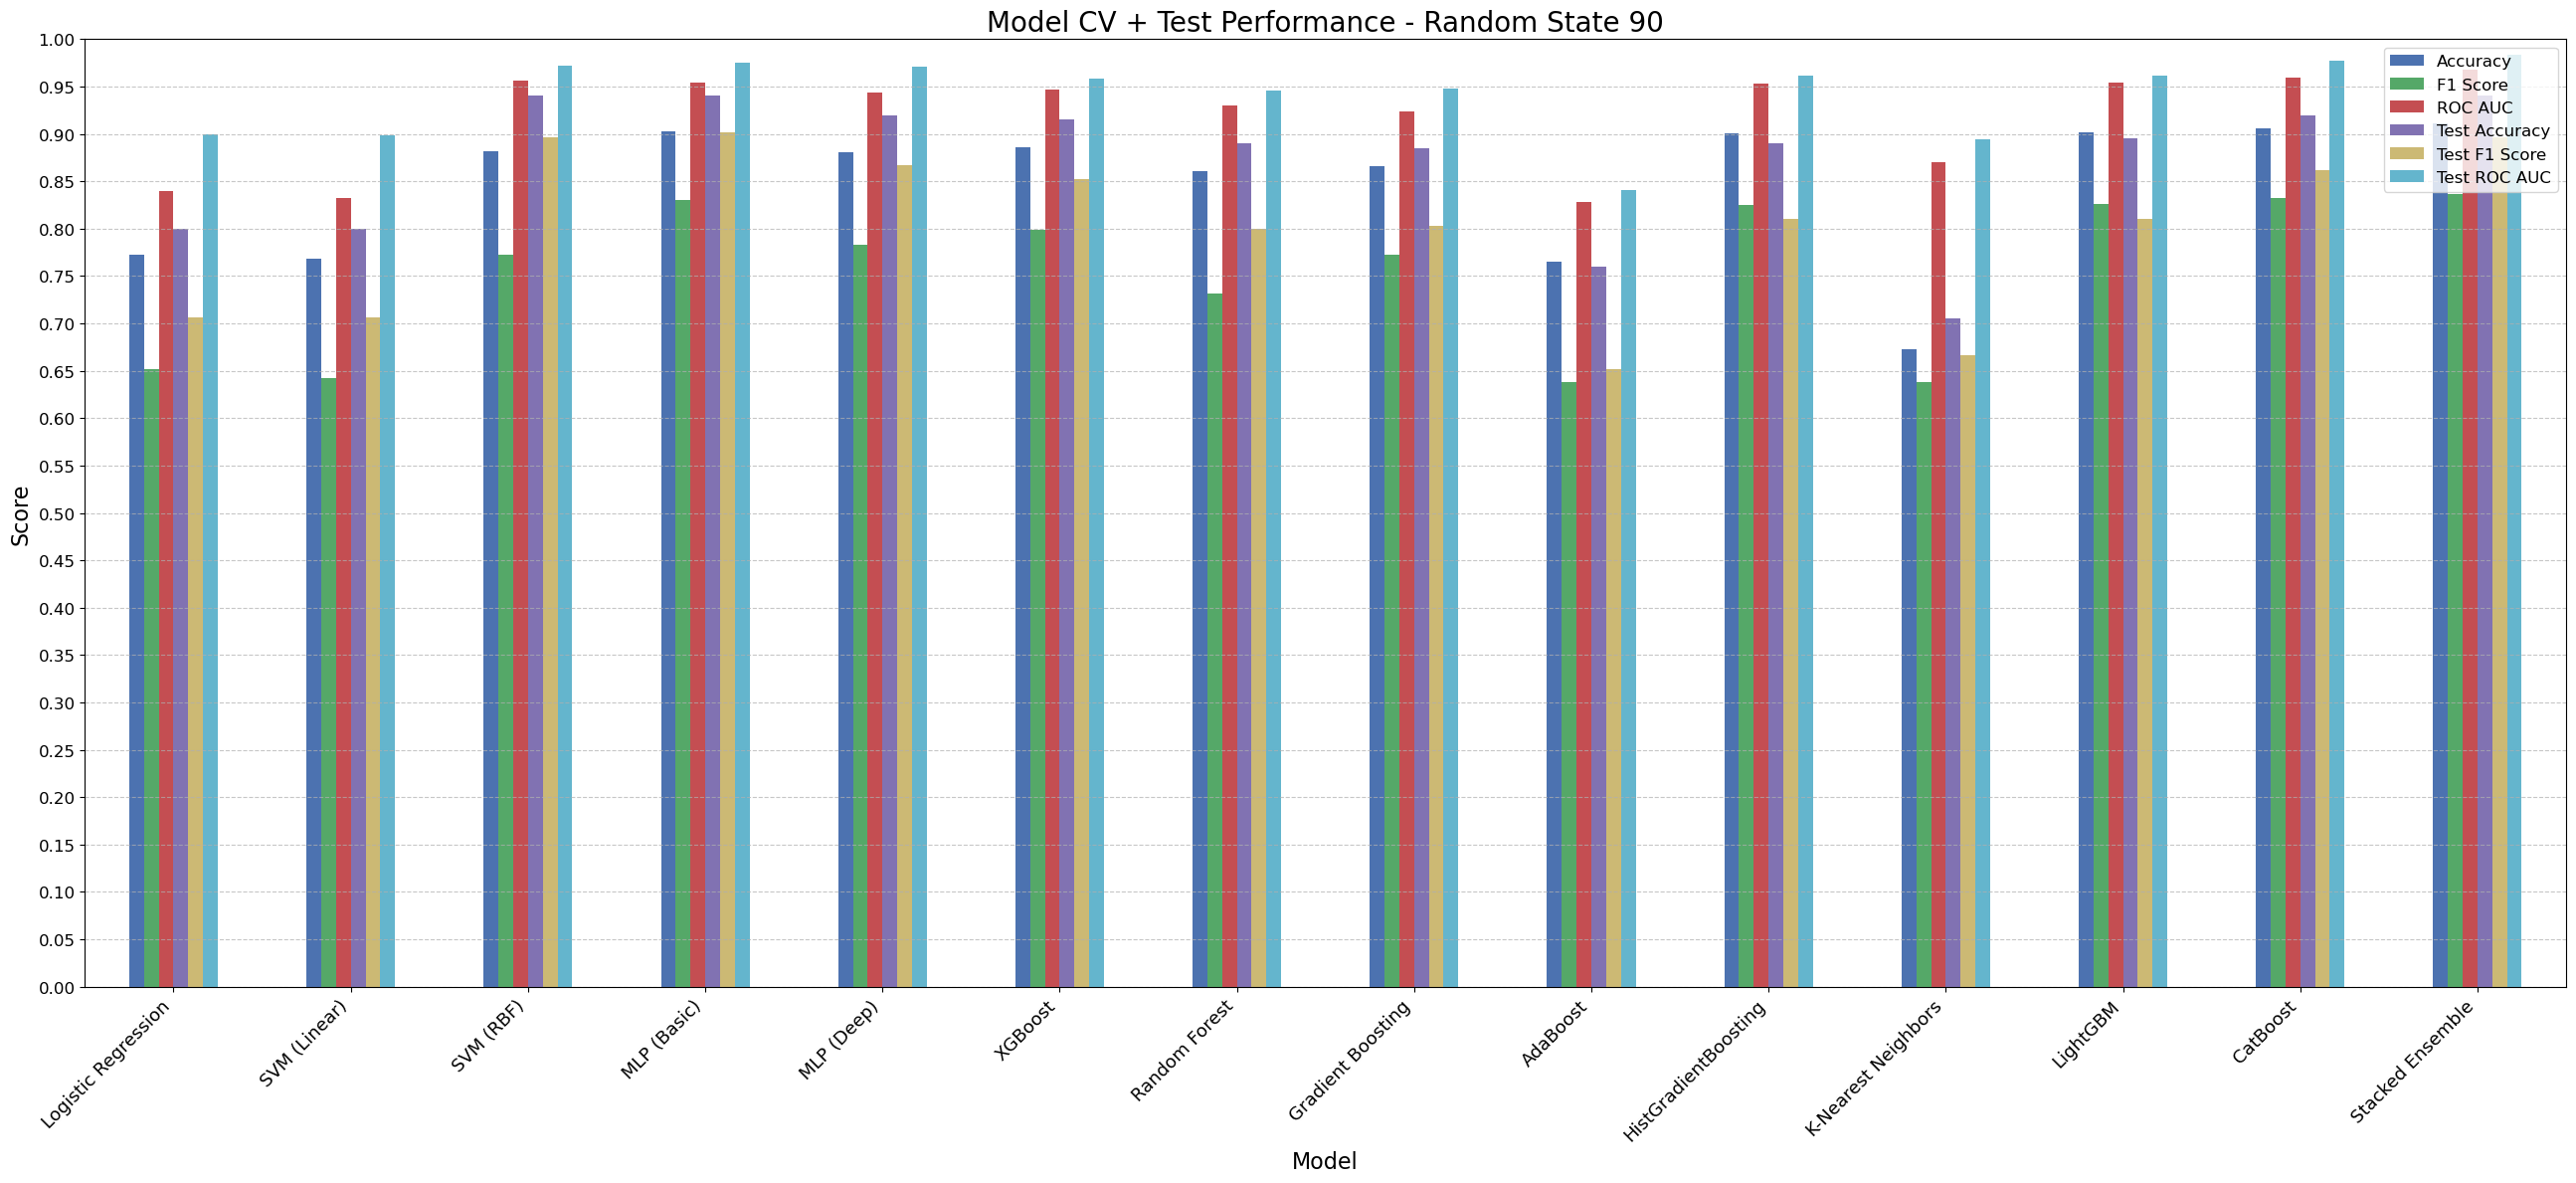

In [23]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Generate a synthetic dataset


# Cross-validation evaluation
def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('smt', SMOTETomek(random_state=42)),
            ('clf', model)
        ])

        pipeline.fit(X_tr, y_tr)
        y_val_pred = pipeline.predict(X_val)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

# Test set evaluation
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smt', SMOTETomek(random_state=42)),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    return {
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Test F1 Score": f1_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test MCC": matthews_corrcoef(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_proba)
    }

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

# Multiple random seeds
random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    results_combined = {}

    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics_cv = evaluate_model_cv(model, X_train, y_train)
        metrics_test = evaluate_on_test(model, X_train, y_train, X_test, y_test)
        combined = {**metrics_cv, **metrics_test}
        results_combined[name] = combined

    df_results = pd.DataFrame(results_combined).T
    all_results[seed] = df_results

    print("\n📊 CV + Test Results:")
    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(26, 12))
    plot_columns = [
        "Accuracy", "F1 Score", "ROC AUC",
        "Test Accuracy", "Test F1 Score", "Test ROC AUC"
    ]
    df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

    ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # ✅ Set y-axis from 0.00 to 1.00 with ticks every 0.05
    custom_yticks = np.arange(0.00, 1.01, 0.05)
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.00, 1.00)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', which='major', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=20,
    n_classes=2, weights=[0.7, 0.3], random_state=42
)

# Evaluation function using SMOTE + Scaling in CV loop
def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('smt', SMOTETomek(random_state=42)),
            ('clf', model)
        ])

        pipeline.fit(X_tr, y_tr)
        y_val_pred = pipeline.predict(X_val)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Plot colors
custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

# Run evaluation over multiple random seeds
random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train, y_train)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(24, 12))
    df_results.plot(kind='bar', ax=ax, color=custom_colors[:len(df_results.columns)])

    ax.set_title(f"Model Performance Comparison - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # Add ticks from 0.0 to 1.0 + 0.75 and 0.85
    custom_yticks = sorted(set(np.round(np.arange(0.0, 1.01, 0.1).tolist() + [0.75, 0.85])))
    ax.set_yticks(custom_yticks)
    ax.set_ylim(0.0, 1.0)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', which='major', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



📌 Evaluating for random state: 66
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost


KeyboardInterrupt: 


📌 Evaluating for random state: 66
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8132             0.8132    0.8145   
SVM (Linear)            0.8172             0.8172    0.8191   
SVM (RBF)               0.9560             0.9560    0.9556   
MLP (Basic)             0.9569             0.9569    0.9573   
MLP (Deep)              0.9479             0.9480    0.9484   
XGBoost                 0.9400             0.9400    0.9403   
Random Forest           0.9315             0.9315    0.9307   
Gradient Boosting       0.9057             0.9057    0.9067   
AdaBoost                0

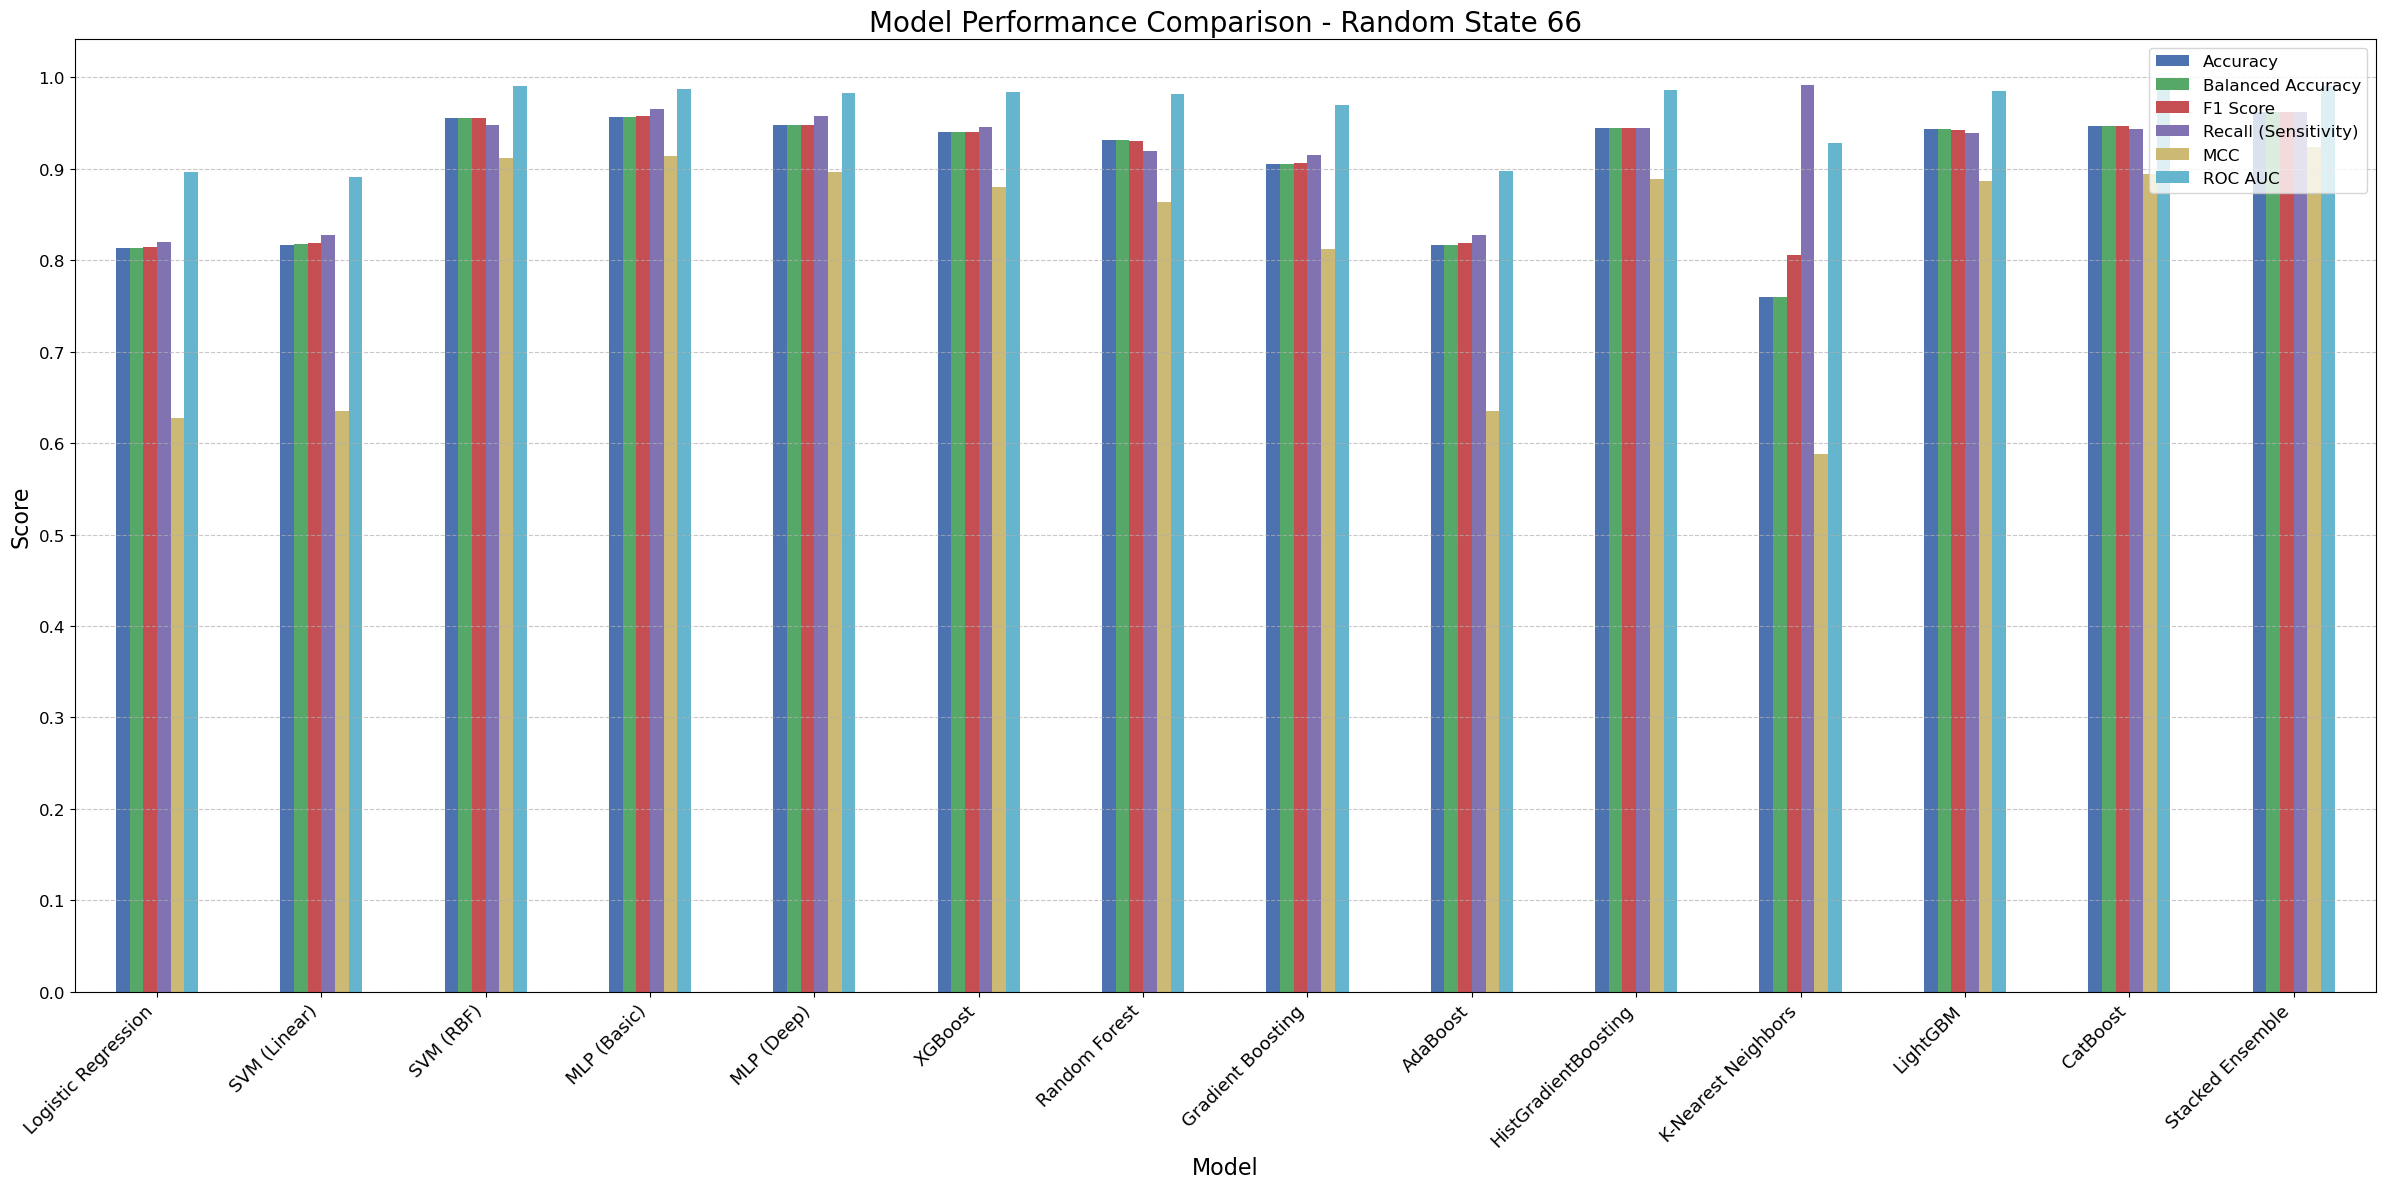


📌 Evaluating for random state: 20
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost
→ Evaluating Stacked Ensemble
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8021             0.8020    0.8013   
SVM (Linear)            0.7981             0.7981    0.7975   
SVM (RBF)               0.9662             0.9662    0.9662   
MLP (Basic)             0.9595             0.9595    0.9602   
MLP (Deep)              0.9497             0.9497    0.9508   
XGBoost                 0.9462             0.9462    0.9466   
Random Forest           0.9342             0.9342    0.9332   
Gradient Boosting       0.9186             0.9186    0.9194   
AdaBoost                0

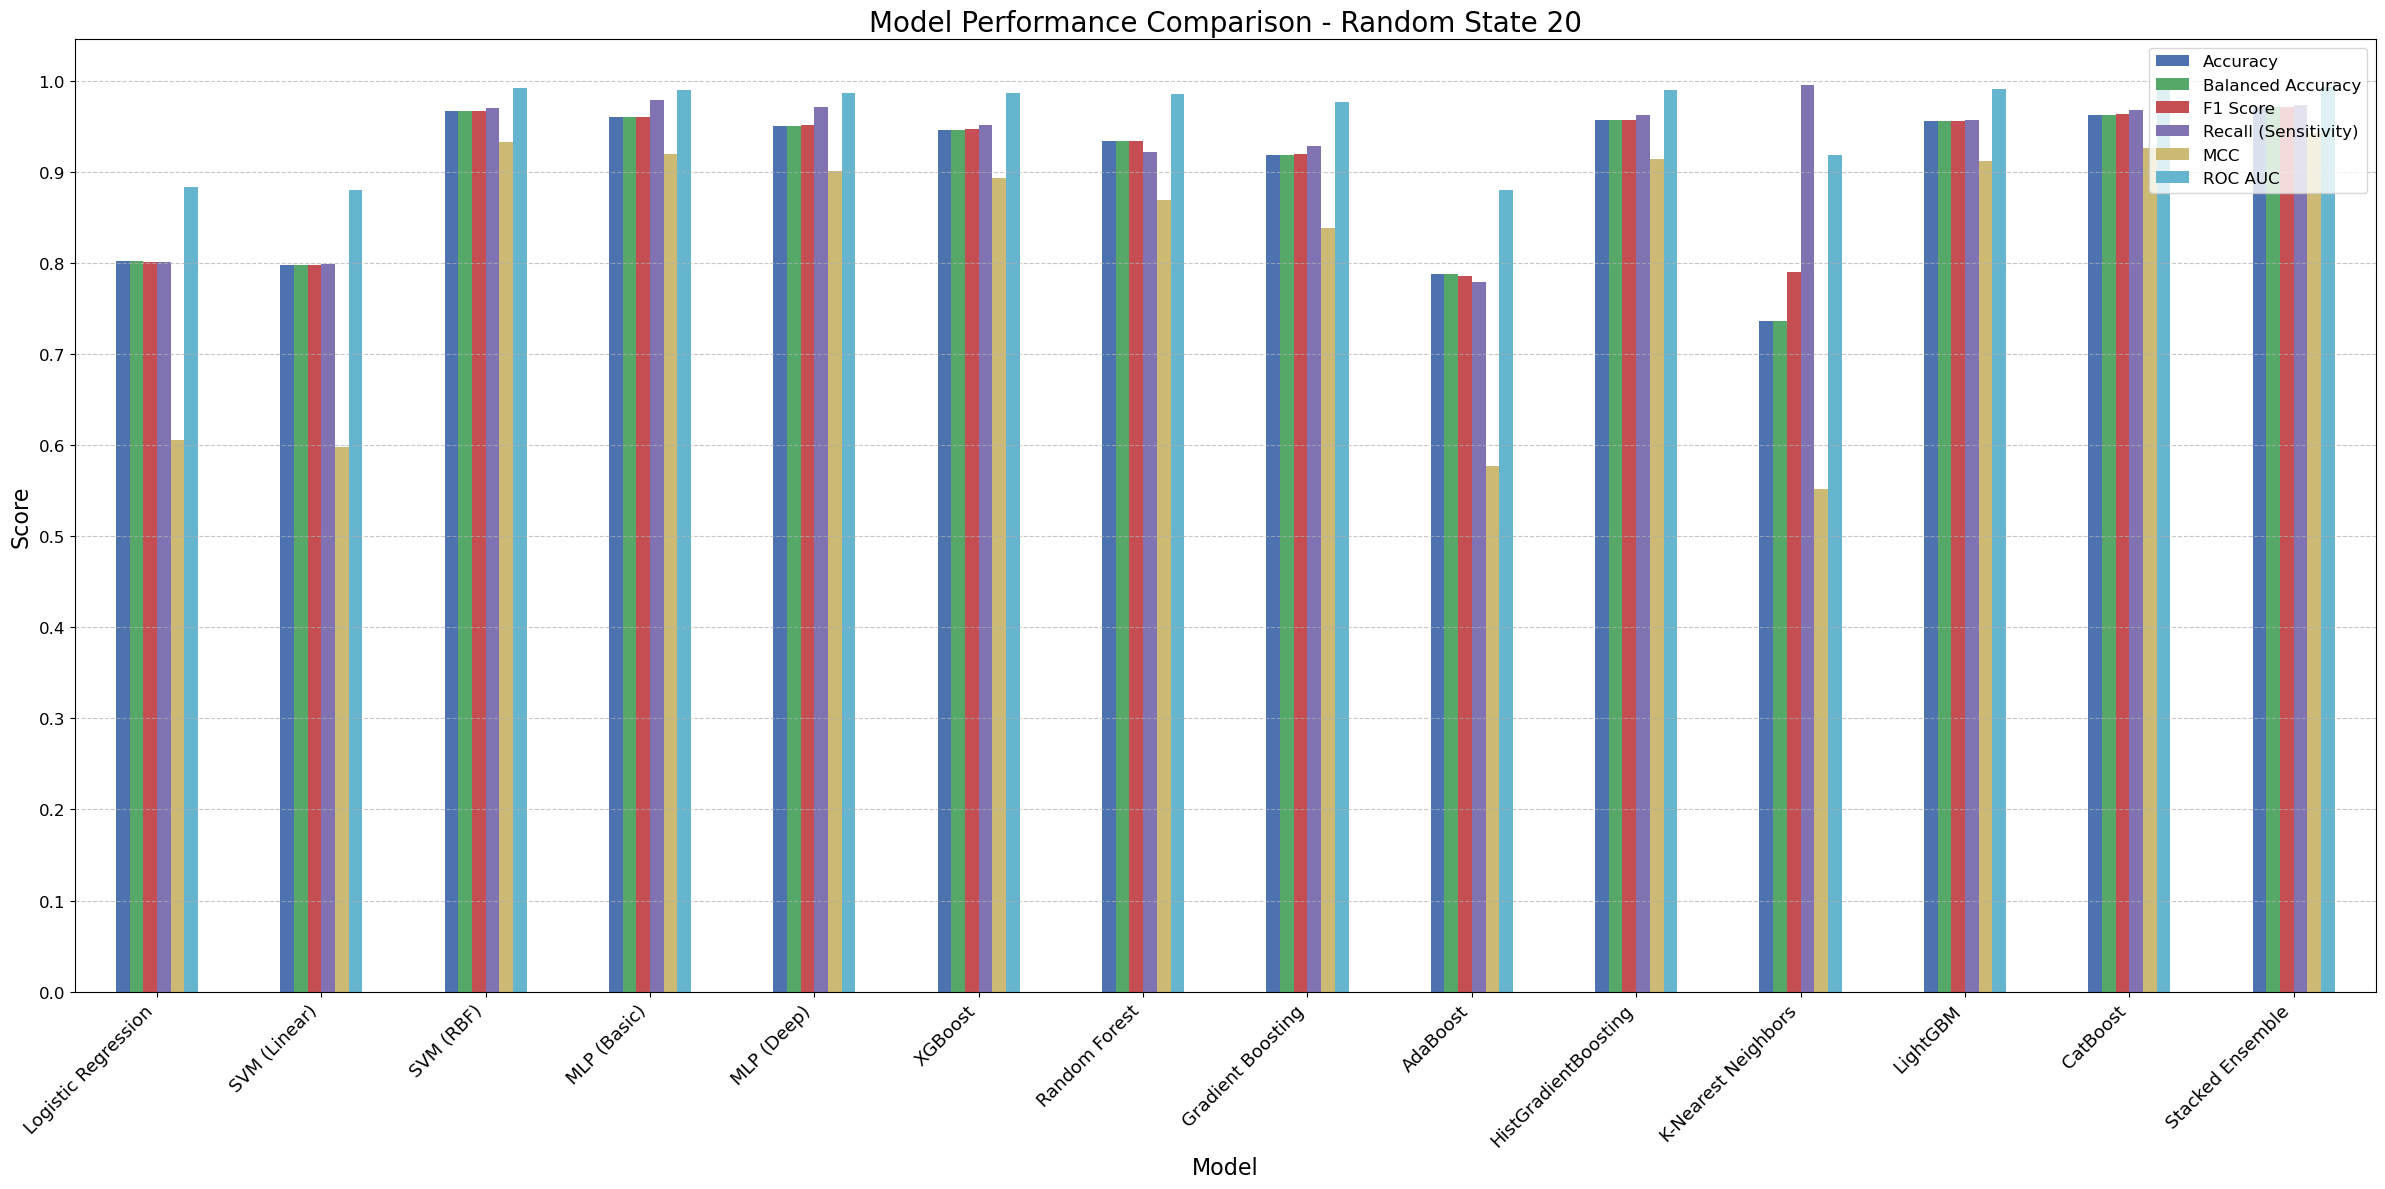


📌 Evaluating for random state: 87
→ Evaluating Logistic Regression
→ Evaluating SVM (Linear)
→ Evaluating SVM (RBF)
→ Evaluating MLP (Basic)
→ Evaluating MLP (Deep)
→ Evaluating XGBoost
→ Evaluating Random Forest
→ Evaluating Gradient Boosting
→ Evaluating AdaBoost
→ Evaluating HistGradientBoosting
→ Evaluating K-Nearest Neighbors
→ Evaluating LightGBM
→ Evaluating CatBoost


KeyboardInterrupt: 

In [17]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.combine import SMOTETomek

# Generate sample data


def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

custom_colors = [
    '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
    '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
    '#BCBD22', '#17BECF', '#D62728', '#9467BD'
]

random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )
    
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    results = {}
    for name, model in models.items():
        print(f"→ Evaluating {name}")
        metrics = evaluate_model_cv(model, X_train_aug, y_train_aug)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    print(df_results.round(4))

    # Plotting
    fig, ax = plt.subplots(figsize=(24, 12))
    df_results.plot(kind='bar', ax=ax, color=custom_colors[:len(df_results.columns)])

    ax.set_title(f"Model Performance Comparison - Random State {seed}", fontsize=20)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xlabel("Model", fontsize=16)
    ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
    ax.legend(loc="upper right", fontsize=12)

    # Y-axis ticks at 0.0, 0.1, ..., 1.0
    ax.yaxis.set_major_locator(mticker.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.tick_params(axis='y', labelsize=12)

    # Only major gridlines (0.1 step)
    ax.grid(which='major', axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


<Figure size 1600x800 with 0 Axes>

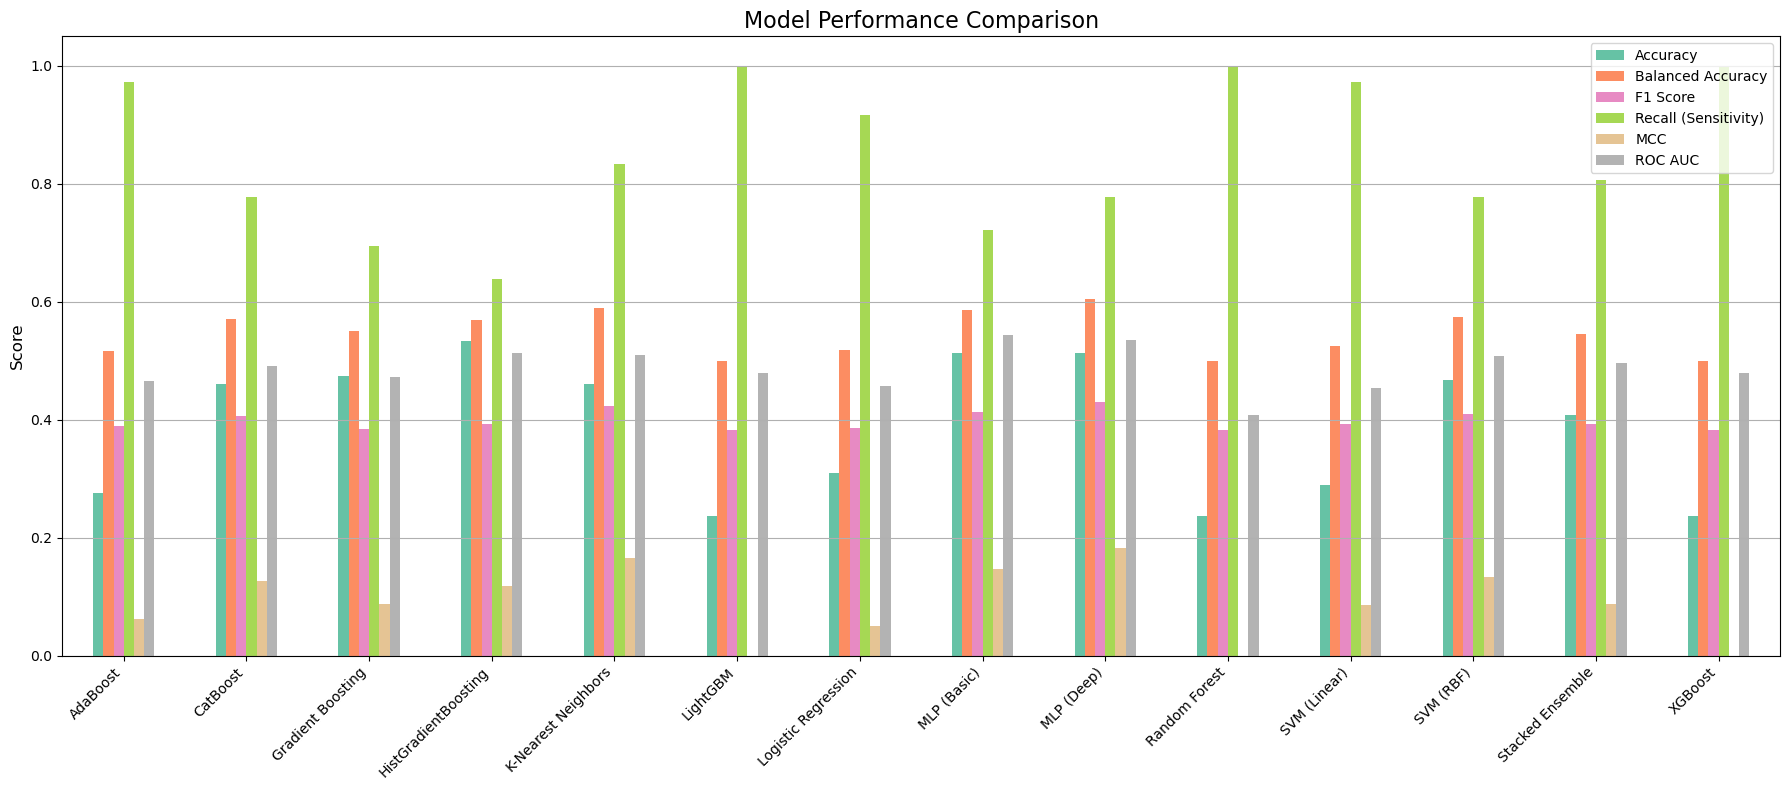

In [15]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score, precision_recall_curve,
    classification_report
)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.combine import SMOTETomek

# --- Functions ---
def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_test_proba)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "Recall (Sensitivity)": recall_score(y_test, y_test_pred),
        "MCC": matthews_corrcoef(y_test, y_test_pred),
        "ROC AUC": roc_auc_score(y_test, y_test_proba)
    }

# --- Define models ---
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss')),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# --- Main Run ---
random_states = [66, 20, 87, 141, 69, 87, 90]  # Use one seed to simplify plot

# Make sure X and y are defined
# Example:
# X = df.drop("target", axis=1).values
# y = df["target"].values

results = {}

for seed in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)
    X_test_scaled = scaler.transform(X_test)

   

    for name, model in models.items():
        calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
        metrics = evaluate_model(calibrated_model, X_train_scaled, y_train_aug, X_test_scaled, y_test)
        results[name] = metrics

# --- Plotting ---
df_results = pd.DataFrame(results).T  # Transpose to make models rows
df_results = df_results.sort_index()

plt.figure(figsize=(16, 8))
df_results.plot(kind='bar', figsize=(18, 8), colormap='Set2')
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="upper right", fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
for seed, df in all_results.items():
    plt.figure(figsize=(16, 8))
    df.plot(kind='bar', figsize=(18, 8), colormap='tab10')
    plt.title(f"Model Performance Comparison - Random State {seed}", fontsize=16)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

NameError: name 'all_results' is not defined


📌 Evaluating for random state: 66
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8779             0.8779    0.8793   
SVM (Linear)            0.8775             0.8775    0.8782   
SVM (RBF)               0.9135             0.9135    0.9123   
MLP (Basic)             0.9234             0.9234    0.9228   
MLP (Deep)              0.9225             0.9225    0.9226   
XGBoost                 0.9279             0.9279    0.9268   
Random Forest           0.9104             0.9104    0.9113   
Gradient Boosting       0.9113             0.9113    0.9116   
AdaBoost                0.8968             0.8968    0.8956   
HistGradientBoosting    0.9432             0.9432    0.9424   
K-Nearest Neighbors     0.8221             0.8221    0.8245   
LightGBM                0.9378             0.9378    0.9371   
CatBoost                0.9144             0.9144    0.9151   
Stacked Ensemble        0.9311             0.9311    0.9306   

                   

<Figure size 1600x800 with 0 Axes>

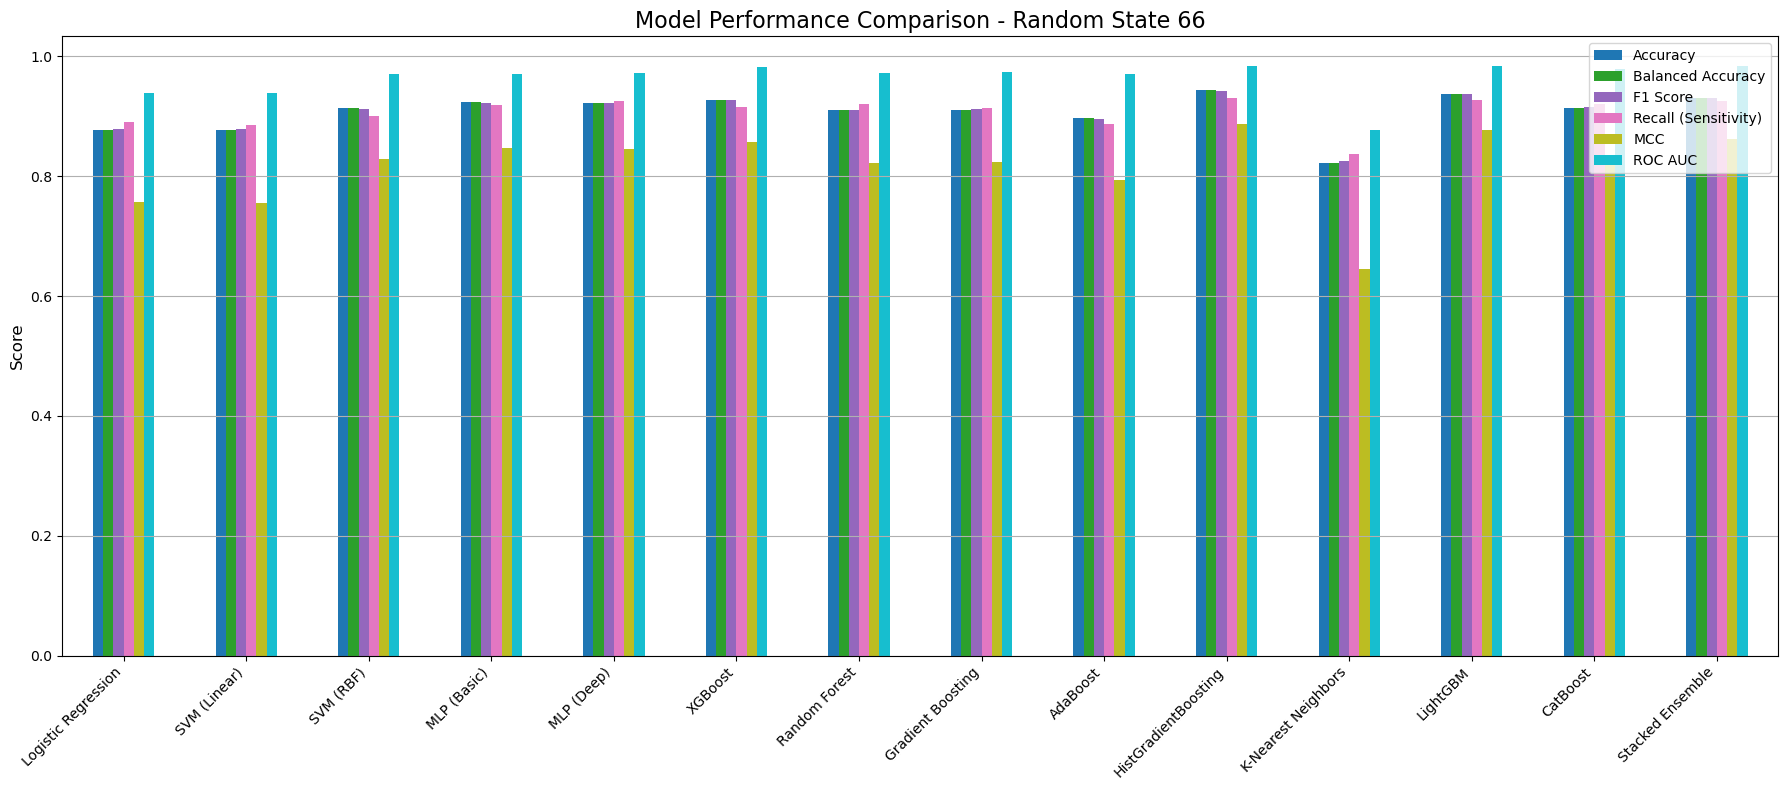


📌 Evaluating for random state: 20
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8883             0.8883    0.8905   
SVM (Linear)            0.8874             0.8874    0.8885   
SVM (RBF)               0.9167             0.9167    0.9155   
MLP (Basic)             0.9257             0.9257    0.9245   
MLP (Deep)              0.9261             0.9261    0.9254   
XGBoost                 0.9446             0.9446    0.9441   
Random Forest           0.9203             0.9203    0.9201   
Gradient Boosting       0.9239             0.9239    0.9239   
AdaBoost                0.9108             0.9108    0.9097   
HistGradientBoosting    0.9482             0.9482    0.9473   
K-Nearest Neighbors     0.8113             0.8113    0.8107   
LightGBM                0.9446             0.9446    0.9438   
CatBoost                0.9302             0.9302    0.9299   
Stacked Ensemble        0.9423             0.9423    0.9420   

                   

<Figure size 1600x800 with 0 Axes>

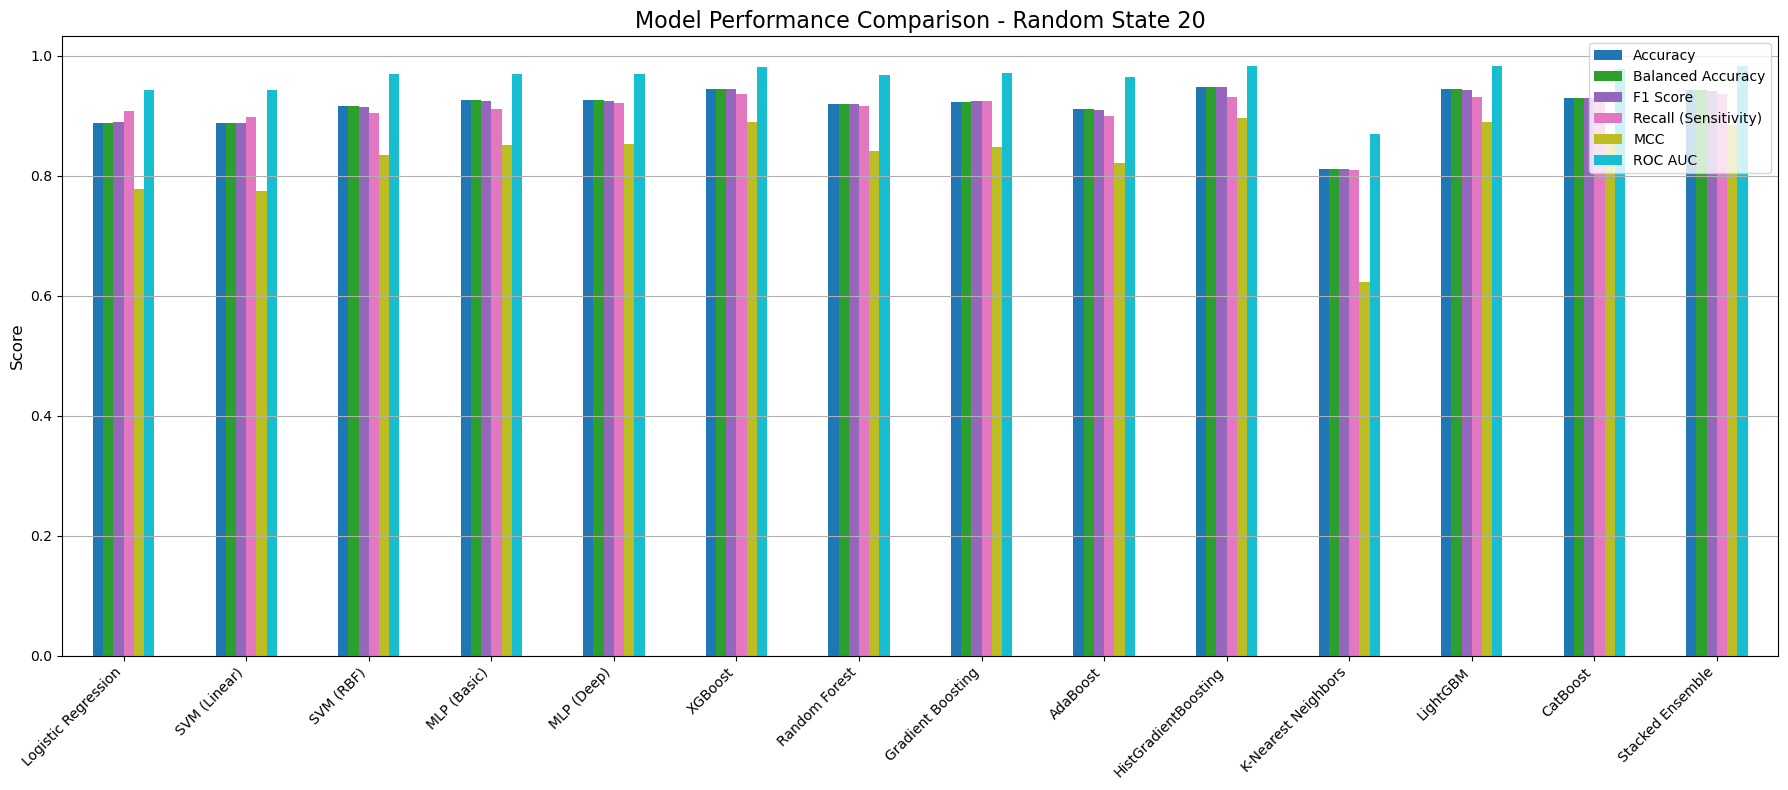


📌 Evaluating for random state: 87
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8698             0.8698    0.8716   
SVM (Linear)            0.8680             0.8680    0.8675   
SVM (RBF)               0.9152             0.9152    0.9142   
MLP (Basic)             0.9134             0.9134    0.9125   
MLP (Deep)              0.9120             0.9120    0.9112   
XGBoost                 0.9286             0.9286    0.9282   
Random Forest           0.9147             0.9147    0.9146   
Gradient Boosting       0.9102             0.9103    0.9090   
AdaBoost                0.8963             0.8963    0.8941   
HistGradientBoosting    0.9381             0.9380    0.9369   
K-Nearest Neighbors     0.8240             0.8241    0.8191   
LightGBM                0.9340             0.9340    0.9329   
CatBoost                0.9223             0.9224    0.9219   
Stacked Ensemble        0.9291             0.9291    0.9290   

                   

<Figure size 1600x800 with 0 Axes>

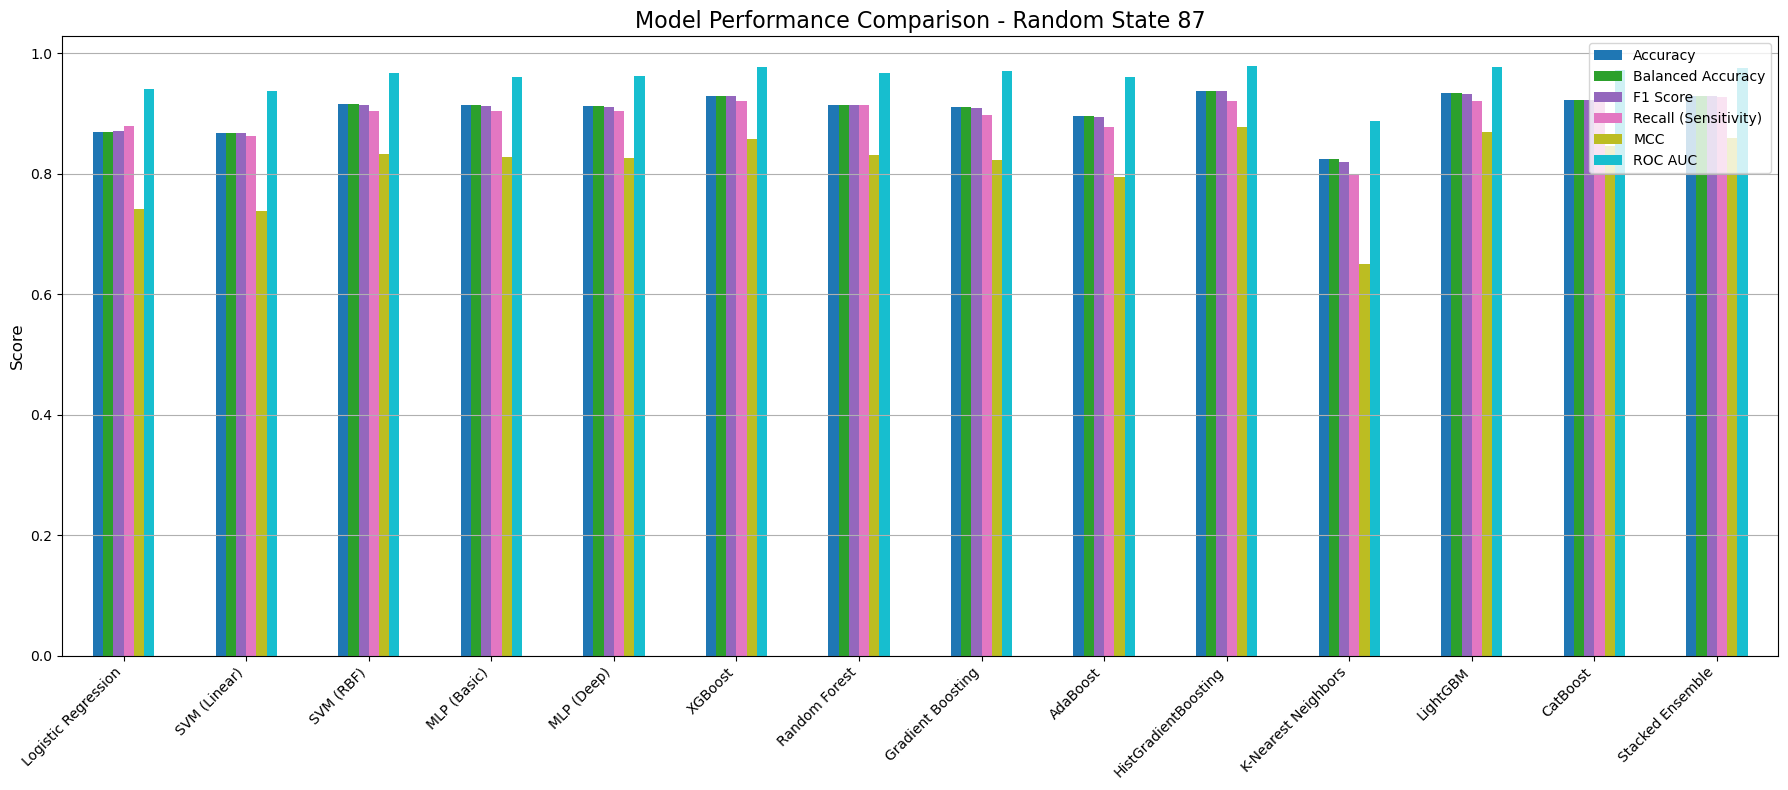


📌 Evaluating for random state: 141
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8764             0.8764    0.8774   
SVM (Linear)            0.8777             0.8777    0.8772   
SVM (RBF)               0.9150             0.9151    0.9130   
MLP (Basic)             0.9168             0.9168    0.9155   
MLP (Deep)              0.9177             0.9177    0.9168   
XGBoost                 0.9236             0.9236    0.9229   
Random Forest           0.9096             0.9097    0.9100   
Gradient Boosting       0.9119             0.9119    0.9120   
AdaBoost                0.9025             0.9025    0.9020   
HistGradientBoosting    0.9312             0.9312    0.9300   
K-Nearest Neighbors     0.8049             0.8049    0.8065   
LightGBM                0.9339             0.9339    0.9335   
CatBoost                0.9141             0.9141    0.9144   
Stacked Ensemble        0.9267             0.9267    0.9266   

                  

<Figure size 1600x800 with 0 Axes>

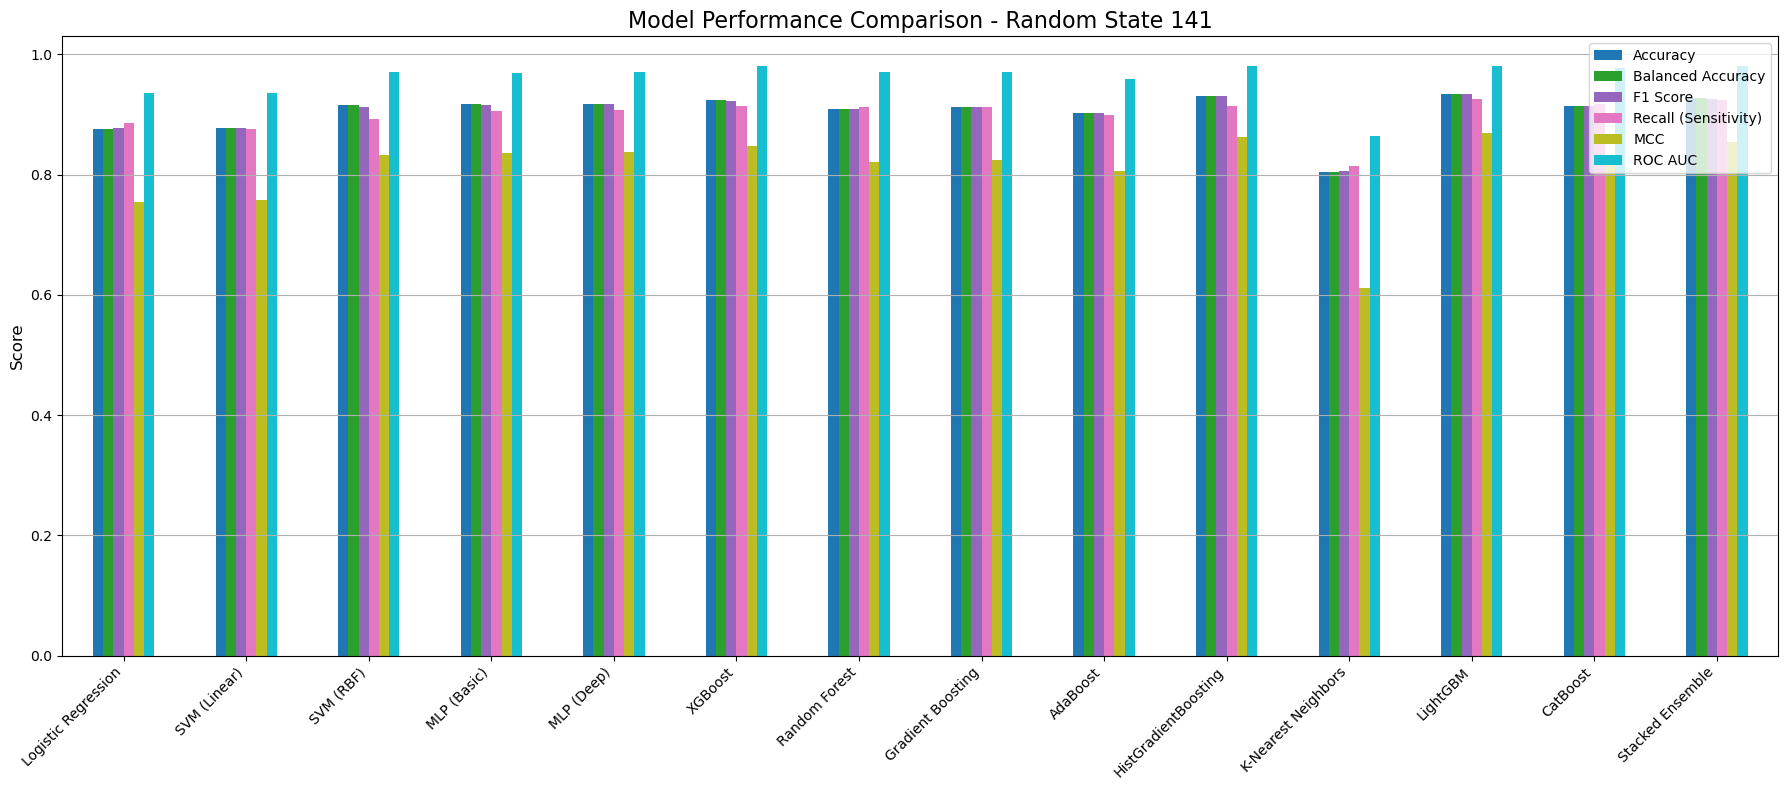


📌 Evaluating for random state: 69
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8730             0.8730    0.8750   
SVM (Linear)            0.8748             0.8749    0.8759   
SVM (RBF)               0.9147             0.9148    0.9135   
MLP (Basic)             0.9188             0.9188    0.9184   
MLP (Deep)              0.9201             0.9201    0.9198   
XGBoost                 0.9291             0.9292    0.9280   
Random Forest           0.9080             0.9080    0.9079   
Gradient Boosting       0.9147             0.9148    0.9133   
AdaBoost                0.9049             0.9049    0.9035   
HistGradientBoosting    0.9367             0.9368    0.9358   
K-Nearest Neighbors     0.7999             0.7998    0.8062   
LightGBM                0.9363             0.9363    0.9353   
CatBoost                0.9206             0.9206    0.9193   
Stacked Ensemble        0.9345             0.9345    0.9338   

                   

<Figure size 1600x800 with 0 Axes>

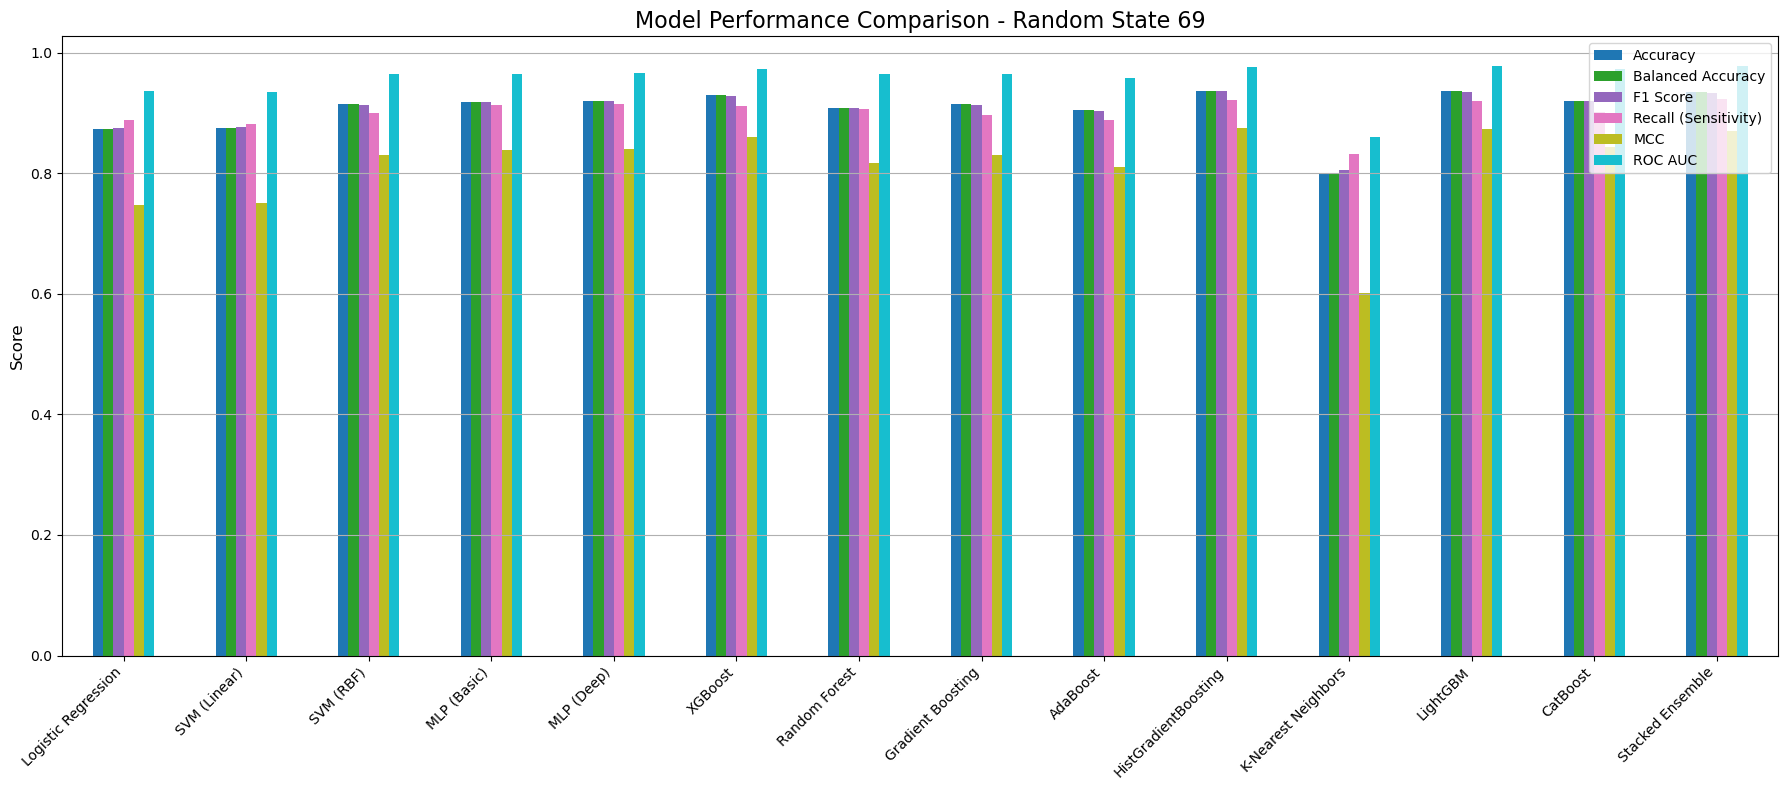


📌 Evaluating for random state: 90
                      Accuracy  Balanced Accuracy  F1 Score  \
Logistic Regression     0.8844             0.8844    0.8868   
SVM (Linear)            0.8813             0.8813    0.8830   
SVM (RBF)               0.9253             0.9253    0.9239   
MLP (Basic)             0.9195             0.9195    0.9184   
MLP (Deep)              0.9244             0.9245    0.9242   
XGBoost                 0.9339             0.9339    0.9329   
Random Forest           0.9159             0.9159    0.9158   
Gradient Boosting       0.9173             0.9173    0.9168   
AdaBoost                0.9110             0.9110    0.9097   
HistGradientBoosting    0.9397             0.9398    0.9387   
K-Nearest Neighbors     0.7927             0.7927    0.7931   
LightGBM                0.9371             0.9371    0.9361   
CatBoost                0.9177             0.9177    0.9176   
Stacked Ensemble        0.9348             0.9348    0.9341   

                   

<Figure size 1600x800 with 0 Axes>

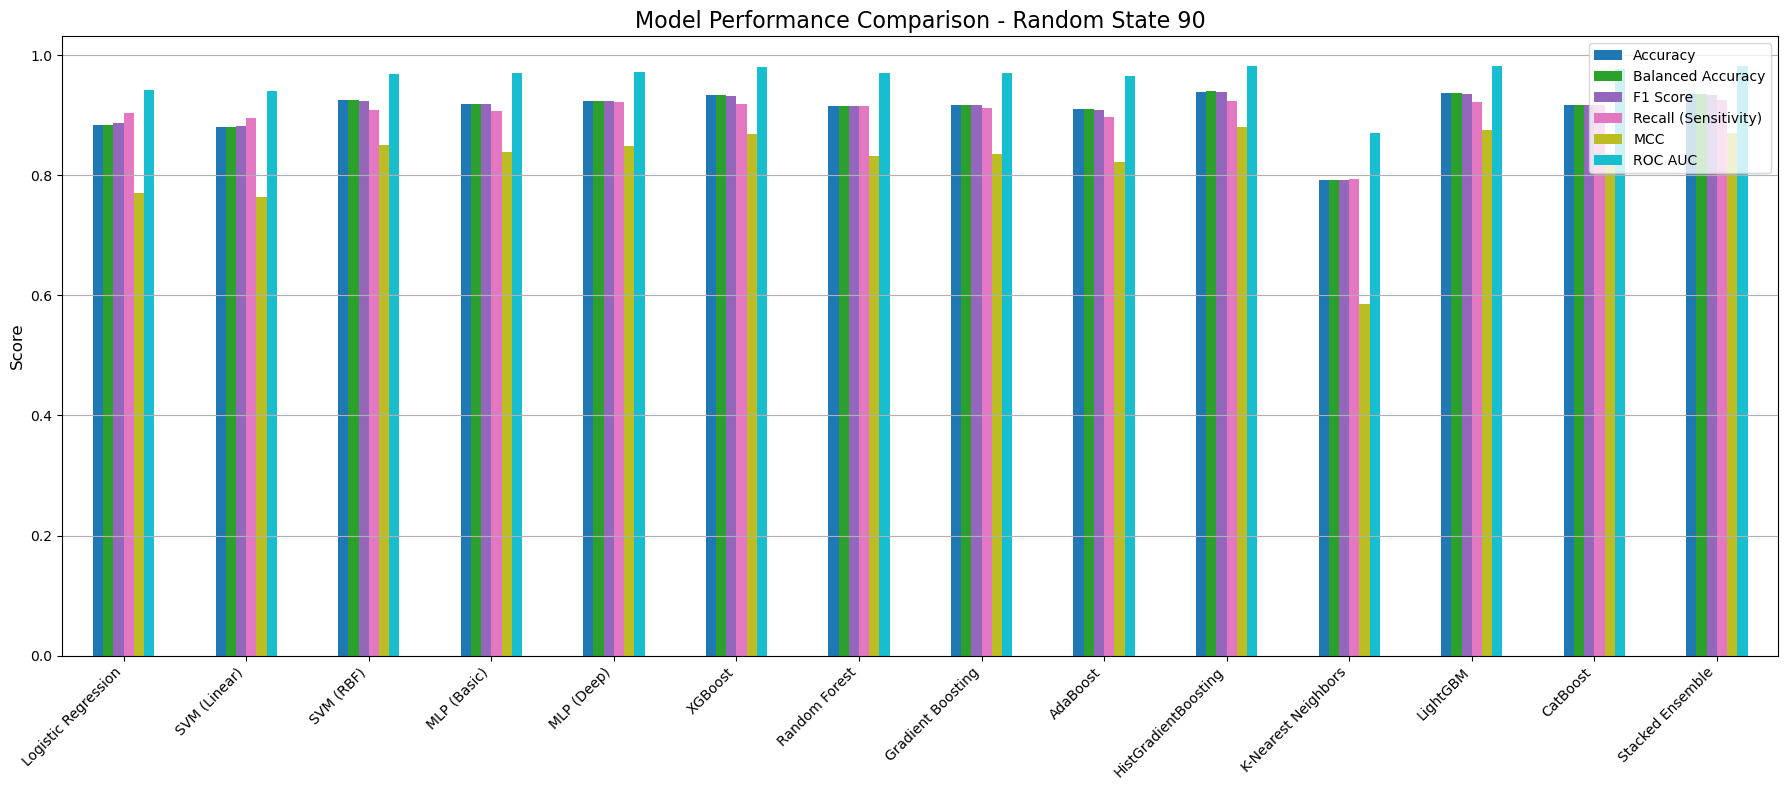

In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, recall_score, precision_recall_curve
)
from sklearn.calibration import CalibratedClassifierCV
from imblearn.combine import SMOTETomek


# Helper functions
def apply_smote(X_train, y_train):
    smt = SMOTETomek(random_state=42)
    return smt.fit_resample(X_train, y_train)

def evaluate_model_cv(model, X, y):
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return {
        "Accuracy": np.mean(accs),
        "Balanced Accuracy": np.mean(baccs),
        "F1 Score": np.mean(f1s),
        "Recall (Sensitivity)": np.mean(recalls),
        "MCC": np.mean(mccs),
        "ROC AUC": np.mean(aucs)
    }

# Models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Main loop over seeds
random_states = [66, 20, 87, 141, 69, 90]
all_results = {}

for seed in random_states:
    print(f"\n📌 Evaluating for random state: {seed}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
    X_train_aug, y_train_aug = apply_smote(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)

    results = {}
    for name, model in models.items():
        calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
        metrics = evaluate_model_cv(calibrated_model, X_train_scaled, y_train_aug)
        results[name] = metrics

    df_results = pd.DataFrame(results).T
    all_results[seed] = df_results

    # Display metrics as table
    print(df_results.round(4))

    # Plotting
    plt.figure(figsize=(16, 8))
    df_results.plot(kind='bar', figsize=(18, 8), colormap='tab10')
    plt.title(f"Model Performance Comparison - Random State {seed}", fontsize=16)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [16]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import Counter
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import (
#     RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
#     HistGradientBoostingClassifier, StackingClassifier
# )
# from xgboost import XGBClassifier
# # from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import (
#     accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score,
#     matthews_corrcoef, precision_recall_curve
# )
# from sklearn.calibration import CalibratedClassifierCV
# from imblearn.combine import SMOTETomek

# # === Define models ===
# models = {
#     "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
#     "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
#     "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
#     "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000),
#     "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
#     "XGBoost": XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss'),
#     "Random Forest": RandomForestClassifier(class_weight='balanced'),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "HistGradientBoosting": HistGradientBoostingClassifier(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     # "LightGBM": LGBMClassifier(class_weight='balanced'),
#     "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
#     "Stacked Ensemble": StackingClassifier(
#         estimators=[
#             ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
#             ('mlp', MLPClassifier(max_iter=1000))
#         ],
#         final_estimator=LogisticRegression()
#     )
# }

# # === SMOTE helper ===
# def apply_smote(X_train, y_train):
#     smt = SMOTETomek(random_state=42)
#     return smt.fit_resample(X_train, y_train)

# # === Threshold Optimization ===
# def find_best_threshold(y_true, y_scores):
#     precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
#     f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
#     return thresholds[np.argmax(f1_scores)]

# # === Replace with your dataset ===
# # X = ...
# # y = ...

# # === Results dictionary ===
# model_scores = {
#     name: {"Accuracy": [], "Balanced Accuracy": [], "F1 Score": [], "AUC": [], "MCC": []}
#     for name in models
# }

# random_states = [66, 20, 87, 141, 69, 87, 90]

# for seed in random_states:
#     print(f"\n=== Random State: {seed} ===")
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

#     # Apply SMOTETomek
#     X_train_aug, y_train_aug = apply_smote(X_train, y_train)

#     # Standardize
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train_aug)
#     X_test_scaled = scaler.transform(X_test)

#     for name, model in models.items():
#         calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
#         calibrated_model.fit(X_train_scaled, y_train_aug)

#         y_pred = calibrated_model.predict(X_test_scaled)
#         y_proba = calibrated_model.predict_proba(X_test_scaled)[:, 1]

#         acc = accuracy_score(y_test, y_pred)
#         bacc = balanced_accuracy_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)
#         auc = roc_auc_score(y_test, y_proba)
#         mcc = matthews_corrcoef(y_test, y_pred)

#         model_scores[name]["Accuracy"].append(acc)
#         model_scores[name]["Balanced Accuracy"].append(bacc)
#         model_scores[name]["F1 Score"].append(f1)
#         model_scores[name]["AUC"].append(auc)
#         model_scores[name]["MCC"].append(mcc)

# # === Compute averages ===
# summary = {
#     "Model": [],
#     "Accuracy": [],
#     "Balanced Accuracy": [],
#     "F1 Score": [],
#     "AUC": [],
#     "MCC": []
# }

# for name, scores in model_scores.items():
#     summary["Model"].append(name)
#     for metric in ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC", "MCC"]:
#         summary[metric].append(np.mean(scores[metric]))

# df_results = pd.DataFrame(summary)

# # === Plot ===
# metrics = ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC", "MCC"]
# x = np.arange(len(df_results["Model"]))
# bar_width = 0.15

# plt.figure(figsize=(16, 7))
# for i, metric in enumerate(metrics):
#     plt.bar(x + i * bar_width, df_results[metric], width=bar_width, label=metric)

# plt.xticks(x + 2 * bar_width, df_results["Model"], rotation=45, ha='right')
# plt.ylabel("Score")
# plt.ylim(0, 1.1)
# plt.title("Average Evaluation Metrics by Model Across Random Seeds")
# plt.legend()
# plt.grid(True, axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()
# # Save the results to a CSV file
# df_results.to_csv('model_evaluation_results.csv', index=False)
# plt.savefig("metrics_plot.png")